# Example of using the Borehole3D class

## Imports

In [1]:
from striplog import Component, Decor, Legend, Lexicon, Striplog
from core.omf import Borehole3D, striplog_legend_to_omf_legend 
from utils.lexicon import Lexicon_FR_updated as lexicon_fr
from utils.io import boreholes_from_files, striplog_from_text,gdf_viewer,\
df_from_sources, striplog_from_df
from core.core import Project
from core.orm import BoreholeOrm, PositionOrm, Base 

import matplotlib.pyplot as plt
from os import remove
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from definitions import ROOT_DIR

## Reading of CSV files in a dir

In [2]:
df = pd.read_csv('test_data_boreholes.csv', sep=',')

## Data Checking

In [3]:
df.drop('Z', axis='columns', inplace=True)
df.rename({'new_Z':'Z'}, axis='columns', inplace=True)

In [4]:
df.loc[df.query('Colour=="tan"').index, 'Colour'] = 'green' # use simple colour

In [5]:
df[:10]

,ID,X,Y,Z,Diameter,Length,Lithology,Colour,Thickness,Top_litho,Base_litho
0,BH001,152600.0,121039.0,101.0,0.43,39,sand,gainsboro,4,0,4
1,BH001,152600.0,121039.0,97.0,0.43,39,clay,green,4,4,8
2,BH001,152600.0,121039.0,93.0,0.43,39,sandstone,forestgreen,12,8,20
3,BH001,152600.0,121039.0,81.0,0.43,39,coal,antiquewhite,8,20,28
4,BH001,152600.0,121039.0,73.0,0.43,39,limestone,darkslategrey,11,28,39
5,BH002,152819.0,121586.0,103.0,0.60,37,sand,gainsboro,5,0,5
6,BH002,152819.0,121586.0,98.0,0.60,37,clay,green,3,5,8
7,BH002,152819.0,121586.0,95.0,0.60,37,sandstone,forestgreen,6,8,14
8,BH002,152819.0,121586.0,89.0,0.60,37,coal,antiquewhite,1,14,15
9,BH002,152819.0,121586.0,88.0,0.60,37,limestone,darkslategrey,22,15,37


## Create Boreholes from dataframes or files

In [6]:
bhs_df=[df] # list of dataframes

In [7]:
boreholes, components, link_intv_comp = boreholes_from_files(bhs_df, verbose=True,
                                                litho_field='Lithology',
                                                color_field='Colour',
                                                lexicon='en', #Lexicon.default(),
                                            diam_field='Diameter', 
                                            thick_field='Thickness')


Dataframe 0 processing...
|__ID:'BH001'
Error : No lithology matching with 'coal antiquewhite' in given lexicon
Summary : [Striplog(5 Intervals, start=0.0, stop=39.0)]
{0: {'description': 'sand gainsboro', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f44663aa760>, 'base': <core.orm.PositionOrm object at 0x7f44663aa460>}, 1: {'description': 'clay green', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f44663aa820>, 'base': <core.orm.PositionOrm object at 0x7f44663aaeb0>}, 2: {'description': 'sandstone forestgreen', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f44663aa7f0>, 'base': <core.orm.PositionOrm object at 0x7f44663aa970>}, 3: {'description': 'white sand', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f44663aaac0>, 'base': <core.orm.PositionOrm object at 0x7f44663aa9a0>}, 4: {'description': 'limestone darkslategrey', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f44663aaaf0>, 'base': <core.o

/home/yanathan/Projects/GSDMA/utils/io.py:518: SAWarning: relationship 'ComponentOrm.intervals' will copy column Components.id to column Linkintervalcomponent.comp_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Components.id to Linkintervalcomponent.comp_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   The 'overlaps' parameter may be used to remove this warning.
  boreholes.append(BoreholeOrm(id=id_))
/home/yanathan/Projects/GSDMA/utils/io.py:518: SAWarning: relationship 'ComponentOrm.intervals' will copy column Intervals.id to column Linkintervalcomponent.int_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Intervals.id to Lin


{130: {'description': 'sand gainsboro', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f4466323dc0>, 'base': <core.orm.PositionOrm object at 0x7f44662bf610>}, 131: {'description': 'clay green', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f44662bfd60>, 'base': <core.orm.PositionOrm object at 0x7f44662de610>}, 132: {'description': 'sandstone forestgreen', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f44662de280>, 'base': <core.orm.PositionOrm object at 0x7f44662de130>}, 133: {'description': 'white sand', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f44662de700>, 'base': <core.orm.PositionOrm object at 0x7f44662de100>}, 134: {'description': 'limestone darkslategrey', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f44662deac0>, 'base': <core.orm.PositionOrm object at 0x7f44662f4c40>}}

|__ID:'BH028'
Error : No lithology matching with 'coal antiquewhite' in given lexicon
Summary : [Striplog(5 Interv

|__ID:'BH065'
Error : No lithology matching with 'coal antiquewhite' in given lexicon
Summary : [Striplog(5 Intervals, start=0.0, stop=19.0)]
{320: {'description': 'sand gainsboro', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f44661819a0>, 'base': <core.orm.PositionOrm object at 0x7f44661f8790>}, 321: {'description': 'clay green', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f44661f8880>, 'base': <core.orm.PositionOrm object at 0x7f44661f8280>}, 322: {'description': 'sandstone forestgreen', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f4466241dc0>, 'base': <core.orm.PositionOrm object at 0x7f44661f89d0>}, 323: {'description': 'white sand', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f44661f8a60>, 'base': <core.orm.PositionOrm object at 0x7f44661d8700>}, 324: {'description': 'limestone darkslategrey', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f44661d8400>, 'base': <core.orm.PositionOrm ob

|__ID:'BH102'
Error : No lithology matching with 'coal antiquewhite' in given lexicon
Summary : [Striplog(5 Intervals, start=0.0, stop=41.0)]
{505: {'description': 'sand gainsboro', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f4466080220>, 'base': <core.orm.PositionOrm object at 0x7f4466080190>}, 506: {'description': 'clay green', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f446613ad00>, 'base': <core.orm.PositionOrm object at 0x7f44660f7d30>}, 507: {'description': 'sandstone forestgreen', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f44660f7d00>, 'base': <core.orm.PositionOrm object at 0x7f44660f73d0>}, 508: {'description': 'white sand', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f44660f71f0>, 'base': <core.orm.PositionOrm object at 0x7f44660f7190>}, 509: {'description': 'limestone darkslategrey', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f44660f7250>, 'base': <core.orm.PositionOrm ob

|__ID:'BH131'
Error : No lithology matching with 'coal antiquewhite' in given lexicon
Summary : [Striplog(5 Intervals, start=0.0, stop=19.0)]
{650: {'description': 'sand gainsboro', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f446602e0a0>, 'base': <core.orm.PositionOrm object at 0x7f446602ea90>}, 651: {'description': 'clay green', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f446602e460>, 'base': <core.orm.PositionOrm object at 0x7f4463fc9940>}, 652: {'description': 'sandstone forestgreen', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f4463fc9790>, 'base': <core.orm.PositionOrm object at 0x7f4463fc9100>}, 653: {'description': 'white sand', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f4463fc9070>, 'base': <core.orm.PositionOrm object at 0x7f4463fc90a0>}, 654: {'description': 'limestone darkslategrey', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f4463fc9700>, 'base': <core.orm.PositionOrm ob

|__ID:'BH161'
Error : No lithology matching with 'coal antiquewhite' in given lexicon
Summary : [Striplog(5 Intervals, start=0.0, stop=33.0)]
{800: {'description': 'sand gainsboro', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f4466287cd0>, 'base': <core.orm.PositionOrm object at 0x7f4466287160>}, 801: {'description': 'clay green', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f4466287250>, 'base': <core.orm.PositionOrm object at 0x7f4466287d90>}, 802: {'description': 'sandstone forestgreen', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f4466287e20>, 'base': <core.orm.PositionOrm object at 0x7f4466287ee0>}, 803: {'description': 'white sand', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f4466287760>, 'base': <core.orm.PositionOrm object at 0x7f4494214c10>}, 804: {'description': 'limestone darkslategrey', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f446635b550>, 'base': <core.orm.PositionOrm ob

Summary : [Striplog(5 Intervals, start=0.0, stop=47.0)]
{930: {'description': 'sand gainsboro', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f446603e250>, 'base': <core.orm.PositionOrm object at 0x7f446603e7c0>}, 931: {'description': 'clay green', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f446603ea30>, 'base': <core.orm.PositionOrm object at 0x7f446603e070>}, 932: {'description': 'sandstone forestgreen', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f446603e100>, 'base': <core.orm.PositionOrm object at 0x7f446603efa0>}, 933: {'description': 'white sand', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f4465fff160>, 'base': <core.orm.PositionOrm object at 0x7f4465fff790>}, 934: {'description': 'limestone darkslategrey', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f4465fff520>, 'base': <core.orm.PositionOrm object at 0x7f4465fff0a0>}}

|__ID:'BH188'
Error : No lithology matching with 'coal anti

In [8]:
boreholes

[<core.orm.BoreholeOrm>(Name=BH001, Length=39, Diameter=0.43, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH002, Length=37, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=18, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=26, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=29, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH006, Length=26, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=41, Diameter=0.57, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH008, Length=35, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=40, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=31, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH011, Length=30, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH012, Length=41, Diameter=0.54, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH013, Length=29, Diameter=0.36, Intervals=5),
 <core.orm.Bore

In [9]:
components

{0: Component({'lithology': 'sandstone'}),
 1: Component({'lithology': 'limestone'}),
 2: Component({'lithology': 'sand', 'colour': 'white'}),
 3: Component({'lithology': 'clay', 'colour': 'green'}),
 4: Component({'lithology': 'sand'})}

In [10]:
len(boreholes), len(components)

(199, 5)

## Create a project and save data in a database

In [11]:
remove('tmp_files/tfe_orm_db.db')

In [12]:
engine = create_engine('sqlite:///tmp_files/tfe_orm_db.db', echo=True)

In [13]:
Base.metadata.create_all(engine)

2021-06-09 02:27:52,778 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:27:52,779 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Boreholes")
2021-06-09 02:27:52,780 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-09 02:27:52,781 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Boreholes")
2021-06-09 02:27:52,782 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-09 02:27:52,783 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Positions")
2021-06-09 02:27:52,783 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-09 02:27:52,784 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Positions")
2021-06-09 02:27:52,785 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-09 02:27:52,786 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Intervals")
2021-06-09 02:27:52,787 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-09 02:27:52,788 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Intervals")
2021-06-09 02:27:52,789 INFO sqlalchemy.engine.Engine 

In [14]:
Session = sessionmaker(bind=engine)
session = Session()

In [15]:
p = Project(session)
p.add_components(components)

2021-06-09 02:27:52,835 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:27:52,838 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 02:27:52,839 INFO sqlalchemy.engine.Engine [generated in 0.00104s] ()
None
2021-06-09 02:27:52,845 INFO sqlalchemy.engine.Engine INSERT INTO "Components" (id, description) VALUES (?, ?)
2021-06-09 02:27:52,846 INFO sqlalchemy.engine.Engine [generated in 0.00110s] ((0, 'Sandstone'), (1, 'Limestone'), (2, 'Sand, white'), (3, 'Clay, green'), (4, 'Sand'))
2021-06-09 02:27:52,847 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 02:27:52,851 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:27:52,852 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 02:27:52,853 INFO sql

Add boreholes into the project

In [16]:
for bh in boreholes:
    p.add_borehole(bh)

2021-06-09 02:27:52,862 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 02:27:52,864 INFO sqlalchemy.engine.Engine [generated in 0.00145s] ('BH001', 39.0, 0.43)
2021-06-09 02:27:52,867 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:27:52,868 INFO sqlalchemy.engine.Engine [generated in 0.00112s] ((0, 0.0, 0.0, 0.0, 152600.0, 121039.0), (1, 4.0, 4.0, 4.0, 152600.0, 121039.0), (2, 4.0, 4.0, 4.0, 152600.0, 121039.0), (3, 8.0, 8.0, 8.0, 152600.0, 121039.0), (4, 8.0, 8.0, 8.0, 152600.0, 121039.0), (5, 20.0, 20.0, 20.0, 152600.0, 121039.0), (6, 20.0, 20.0, 20.0, 152600.0, 121039.0), (7, 28.0, 28.0, 28.0, 152600.0, 121039.0), (8, 28.0, 28.0, 28.0, 152600.0, 121039.0), (9, 39.0, 39.0, 39.0, 152600.0, 121039.0))
2021-06-09 02:27:52,870 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, 

None
2021-06-09 02:27:53,034 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:27:53,035 INFO sqlalchemy.engine.Engine [cached since 0.1482s ago] ('BH002',)
2021-06-09 02:27:53,037 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:53,038 INFO sqlalchemy.engine.Engine [cached since 0.1458s ago] (10,)
2021-06-09 02:27:53,040 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Position

2021-06-09 02:27:53,200 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:53,201 INFO sqlalchemy.engine.Engine [cached since 0.306s ago] (23,)
2021-06-09 02:27:53,203 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:53,204 INFO sqlalchemy.engine.Engine [cached since 0.3125s ago] (24,)
2021-06-09 02:27:53,206 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "P

2021-06-09 02:27:53,357 INFO sqlalchemy.engine.Engine [cached since 0.4623s ago] (37,)
2021-06-09 02:27:53,360 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:53,361 INFO sqlalchemy.engine.Engine [cached since 0.469s ago] (38,)
2021-06-09 02:27:53,363 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:53,364 INFO sqlalchemy.engine.Engine [cached since 0.4684s ago] (39,)
No given legend or incorrect format ! A default one is used
Borehole geometry created succes

2021-06-09 02:27:53,617 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:27:53,618 INFO sqlalchemy.engine.Engine [cached since 0.7478s ago] ((25, 'BH006', 0, 'sand gainsboro', 50, 51), (26, 'BH006', 1, 'clay green', 52, 53), (27, 'BH006', 2, 'sandstone forestgreen', 54, 55), (28, 'BH006', 3, 'white sand', 56, 57), (29, 'BH006', 4, 'limestone darkslategrey', 58, 59))
2021-06-09 02:27:53,620 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 02:27:53,624 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:27:53,625 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 02:27:53,626 INFO sqlalchemy.engine.Engine [cached since 0.7882s ago] ()
None
2021-06-09 02:27:53,630 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Interva

2021-06-09 02:27:53,794 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:53,795 INFO sqlalchemy.engine.Engine [cached since 0.8995s ago] (61,)
2021-06-09 02:27:53,797 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:53,798 INFO sqlalchemy.engine.Engine [cached since 0.9059s ago] (62,)
2021-06-09 02:27:53,799 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 02:27:53,961 INFO sqlalchemy.engine.Engine [cached since 1.066s ago] (75,)
2021-06-09 02:27:53,964 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:53,965 INFO sqlalchemy.engine.Engine [cached since 1.073s ago] (76,)
2021-06-09 02:27:53,967 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:53,968 INFO sqlalchemy.engine.Engine [cached since 1.073s ago] (77,)
2021-06-09 02:27:53,970 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id",

No given legend or incorrect format ! A default one is used
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 02:27:54,230 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 02:27:54,231 INFO sqlalchemy.engine.Engine [cached since 1.368s ago] ('BH10', 31.0, 0.31)
2021-06-09 02:27:54,232 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:27:54,233 INFO sqlalchemy.engine.Engine [cached since 1.366s ago] ((90, 0.0, 0.0, 0.0, 152819.0, 121586.0), (91, 5.0, 5.0, 5.0, 152819.0, 121586.0), (92, 5.0, 5.0, 5.0, 152819.0, 121586.0), (93, 9.0, 9.0, 9.0, 152819.0, 121586.0), (94, 9.0, 9.0, 9.0, 152819.0, 121586.0), (95, 11.0, 11.0, 11.0, 152819.0, 121586.0), (96, 11.0, 11.0, 11.0, 152819.0, 121586.0), (97, 14.0, 14.0, 14.0, 152819.0, 121586.0), (98, 14.0, 14.0, 14.0, 152819.0, 121586.0), (99, 31.0, 31.0, 31.0, 152819.0, 121586.

2021-06-09 02:27:54,391 INFO sqlalchemy.engine.Engine [cached since 1.553s ago] ()
None
2021-06-09 02:27:54,397 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:27:54,398 INFO sqlalchemy.engine.Engine [cached since 1.511s ago] ('BH011',)
2021-06-09 02:27:54,400 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:54,401 INFO sqlalchemy.engine.Engine [cached since 1.509s ago] (100,)
2021-06-09 02:27:54,40

2021-06-09 02:27:54,560 INFO sqlalchemy.engine.Engine [cached since 1.668s ago] (112,)
2021-06-09 02:27:54,562 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:54,563 INFO sqlalchemy.engine.Engine [cached since 1.667s ago] (113,)
2021-06-09 02:27:54,564 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:54,565 INFO sqlalchemy.engine.Engine [cached since 1.674s ago] (114,)
2021-06-09 02:27:54,567 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 02:27:54,728 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:54,729 INFO sqlalchemy.engine.Engine [cached since 1.834s ago] (127,)
2021-06-09 02:27:54,732 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:54,732 INFO sqlalchemy.engine.Engine [cached since 1.84s ago] (128,)
2021-06-09 02:27:54,734 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "P

2021-06-09 02:27:55,004 INFO sqlalchemy.engine.Engine [cached since 2.137s ago] ((140, 0.0, 0.0, 0.0, 152922.0, 121313.0), (141, 3.0, 3.0, 3.0, 152922.0, 121313.0), (142, 3.0, 3.0, 3.0, 152922.0, 121313.0), (143, 5.0, 5.0, 5.0, 152922.0, 121313.0), (144, 5.0, 5.0, 5.0, 152922.0, 121313.0), (145, 10.0, 10.0, 10.0, 152922.0, 121313.0), (146, 10.0, 10.0, 10.0, 152922.0, 121313.0), (147, 16.0, 16.0, 16.0, 152922.0, 121313.0), (148, 16.0, 16.0, 16.0, 152922.0, 121313.0), (149, 31.0, 31.0, 31.0, 152922.0, 121313.0))
2021-06-09 02:27:55,006 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:27:55,007 INFO sqlalchemy.engine.Engine [cached since 2.137s ago] ((70, 'BH015', 0, 'sand gainsboro', 140, 141), (71, 'BH015', 1, 'clay green', 142, 143), (72, 'BH015', 2, 'sandstone forestgreen', 144, 145), (73, 'BH015', 3, 'white sand', 146, 147), (74, 'BH015', 4, 'limestone darkslategrey', 148, 149))

2021-06-09 02:27:55,172 INFO sqlalchemy.engine.Engine [cached since 2.286s ago] ('BH016',)
2021-06-09 02:27:55,175 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:55,176 INFO sqlalchemy.engine.Engine [cached since 2.284s ago] (150,)
2021-06-09 02:27:55,178 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:55,179 INFO sqlalchemy.engine.Engine [cached since 2.284s ago] (151,)
2021-06-09 02:27:55,181 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positio

2021-06-09 02:27:55,342 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:55,343 INFO sqlalchemy.engine.Engine [cached since 2.451s ago] (164,)
2021-06-09 02:27:55,345 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:55,346 INFO sqlalchemy.engine.Engine [cached since 2.451s ago] (165,)
2021-06-09 02:27:55,348 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 02:27:55,515 INFO sqlalchemy.engine.Engine [cached since 2.623s ago] (178,)
2021-06-09 02:27:55,516 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:55,517 INFO sqlalchemy.engine.Engine [cached since 2.622s ago] (179,)
No given legend or incorrect format ! A default one is used
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 02:27:55,620 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 02:27:55,621 INFO sqlalchemy.engine.Engine [cached since 2.759s ago] ('BH019', 30.0, 0.43)
2021-06-09 02:27:55,623 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
202

2021-06-09 02:27:55,788 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 02:27:55,792 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:27:55,793 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 02:27:55,793 INFO sqlalchemy.engine.Engine [cached since 2.955s ago] ()
None
2021-06-09 02:27:55,798 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:27:55,799 INFO sqlalchemy.engine.Engine [cached since 2.912s ago] ('BH020',)
2021-06-09 02:27:55,801 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Posit

2021-06-09 02:27:55,966 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:55,967 INFO sqlalchemy.engine.Engine [cached since 3.075s ago] (202,)
2021-06-09 02:27:55,968 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:55,969 INFO sqlalchemy.engine.Engine [cached since 3.074s ago] (203,)
2021-06-09 02:27:55,971 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 02:27:56,128 INFO sqlalchemy.engine.Engine [cached since 3.236s ago] (216,)
2021-06-09 02:27:56,130 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:56,131 INFO sqlalchemy.engine.Engine [cached since 3.236s ago] (217,)
2021-06-09 02:27:56,133 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:56,134 INFO sqlalchemy.engine.Engine [cached since 3.242s ago] (218,)
2021-06-09 02:27:56,136 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 02:27:56,381 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:27:56,382 INFO sqlalchemy.engine.Engine [cached since 3.515s ago] ((230, 0.0, 0.0, 0.0, 152473.0, 121460.0), (231, 1.0, 1.0, 1.0, 152473.0, 121460.0), (232, 1.0, 1.0, 1.0, 152473.0, 121460.0), (233, 5.0, 5.0, 5.0, 152473.0, 121460.0), (234, 5.0, 5.0, 5.0, 152473.0, 121460.0), (235, 11.0, 11.0, 11.0, 152473.0, 121460.0), (236, 11.0, 11.0, 11.0, 152473.0, 121460.0), (237, 16.0, 16.0, 16.0, 152473.0, 121460.0), (238, 16.0, 16.0, 16.0, 152473.0, 121460.0), (239, 18.0, 18.0, 18.0, 152473.0, 121460.0))
2021-06-09 02:27:56,384 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:27:56,385 INFO sqlalchemy.engine.Engine [cached since 3.514s ago] ((115, 'BH024', 0, 'sand gainsboro', 230, 231), (116, 'BH024', 1, 'clay green', 232, 233), (117, 'BH0

2021-06-09 02:27:56,542 INFO sqlalchemy.engine.Engine [cached since 3.656s ago] ('BH025',)
2021-06-09 02:27:56,544 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:56,545 INFO sqlalchemy.engine.Engine [cached since 3.653s ago] (240,)
2021-06-09 02:27:56,547 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:56,547 INFO sqlalchemy.engine.Engine [cached since 3.652s ago] (241,)
2021-06-09 02:27:56,549 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positio

2021-06-09 02:27:56,690 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:56,690 INFO sqlalchemy.engine.Engine [cached since 3.799s ago] (254,)
2021-06-09 02:27:56,692 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:56,693 INFO sqlalchemy.engine.Engine [cached since 3.797s ago] (255,)
2021-06-09 02:27:56,694 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 02:27:56,827 INFO sqlalchemy.engine.Engine [cached since 3.935s ago] (268,)
2021-06-09 02:27:56,828 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:56,829 INFO sqlalchemy.engine.Engine [cached since 3.934s ago] (269,)
No given legend or incorrect format ! A default one is used
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 02:27:56,902 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 02:27:56,903 INFO sqlalchemy.engine.Engine [cached since 4.04s ago] ('BH028', 18.0, 0.37)
2021-06-09 02:27:56,904 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021

2021-06-09 02:27:57,024 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 02:27:57,029 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:27:57,030 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 02:27:57,031 INFO sqlalchemy.engine.Engine [cached since 4.193s ago] ()
None
2021-06-09 02:27:57,035 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:27:57,036 INFO sqlalchemy.engine.Engine [cached since 4.15s ago] ('BH029',)
2021-06-09 02:27:57,038 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positi

2021-06-09 02:27:57,149 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:57,150 INFO sqlalchemy.engine.Engine [cached since 4.258s ago] (292,)
2021-06-09 02:27:57,152 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:57,153 INFO sqlalchemy.engine.Engine [cached since 4.257s ago] (293,)
2021-06-09 02:27:57,154 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 02:27:57,263 INFO sqlalchemy.engine.Engine [cached since 4.371s ago] (306,)
2021-06-09 02:27:57,264 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:57,264 INFO sqlalchemy.engine.Engine [cached since 4.369s ago] (307,)
2021-06-09 02:27:57,265 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:57,266 INFO sqlalchemy.engine.Engine [cached since 4.374s ago] (308,)
2021-06-09 02:27:57,267 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 02:27:57,451 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:27:57,452 INFO sqlalchemy.engine.Engine [cached since 4.585s ago] ((320, 0.0, 0.0, 0.0, 152794.0, 121111.0), (321, 5.0, 5.0, 5.0, 152794.0, 121111.0), (322, 5.0, 5.0, 5.0, 152794.0, 121111.0), (323, 7.0, 7.0, 7.0, 152794.0, 121111.0), (324, 7.0, 7.0, 7.0, 152794.0, 121111.0), (325, 19.0, 19.0, 19.0, 152794.0, 121111.0), (326, 19.0, 19.0, 19.0, 152794.0, 121111.0), (327, 21.0, 21.0, 21.0, 152794.0, 121111.0), (328, 21.0, 21.0, 21.0, 152794.0, 121111.0), (329, 41.0, 41.0, 41.0, 152794.0, 121111.0))
2021-06-09 02:27:57,454 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:27:57,454 INFO sqlalchemy.engine.Engine [cached since 4.584s ago] ((160, 'BH033', 0, 'sand gainsboro', 320, 321), (161, 'BH033', 1, 'clay green', 322, 323), (162, 'BH0

2021-06-09 02:27:57,577 INFO sqlalchemy.engine.Engine [cached since 4.691s ago] ('BH034',)
2021-06-09 02:27:57,579 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:57,580 INFO sqlalchemy.engine.Engine [cached since 4.689s ago] (330,)
2021-06-09 02:27:57,582 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:57,583 INFO sqlalchemy.engine.Engine [cached since 4.688s ago] (331,)
2021-06-09 02:27:57,585 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positio

2021-06-09 02:27:57,696 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:57,697 INFO sqlalchemy.engine.Engine [cached since 4.805s ago] (344,)
2021-06-09 02:27:57,699 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:57,699 INFO sqlalchemy.engine.Engine [cached since 4.804s ago] (345,)
2021-06-09 02:27:57,701 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 02:27:57,809 INFO sqlalchemy.engine.Engine [cached since 4.917s ago] (358,)
2021-06-09 02:27:57,811 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:57,812 INFO sqlalchemy.engine.Engine [cached since 4.916s ago] (359,)
No given legend or incorrect format ! A default one is used
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 02:27:57,874 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 02:27:57,875 INFO sqlalchemy.engine.Engine [cached since 5.013s ago] ('BH037', 20.0, 0.35)
2021-06-09 02:27:57,877 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
202

2021-06-09 02:27:57,981 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 02:27:57,984 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:27:57,985 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 02:27:57,985 INFO sqlalchemy.engine.Engine [cached since 5.147s ago] ()
None
2021-06-09 02:27:57,991 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:27:57,992 INFO sqlalchemy.engine.Engine [cached since 5.105s ago] ('BH038',)
2021-06-09 02:27:57,994 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Posit

2021-06-09 02:27:58,108 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:58,109 INFO sqlalchemy.engine.Engine [cached since 5.218s ago] (382,)
2021-06-09 02:27:58,111 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:58,112 INFO sqlalchemy.engine.Engine [cached since 5.217s ago] (383,)
2021-06-09 02:27:58,113 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 02:27:58,226 INFO sqlalchemy.engine.Engine [cached since 5.334s ago] (396,)
2021-06-09 02:27:58,228 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:58,229 INFO sqlalchemy.engine.Engine [cached since 5.333s ago] (397,)
2021-06-09 02:27:58,230 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:58,231 INFO sqlalchemy.engine.Engine [cached since 5.339s ago] (398,)
2021-06-09 02:27:58,233 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 02:27:58,411 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:27:58,411 INFO sqlalchemy.engine.Engine [cached since 5.545s ago] ((410, 0.0, 0.0, 0.0, 152052.0, 121293.0), (411, 6.0, 6.0, 6.0, 152052.0, 121293.0), (412, 6.0, 6.0, 6.0, 152052.0, 121293.0), (413, 7.0, 7.0, 7.0, 152052.0, 121293.0), (414, 7.0, 7.0, 7.0, 152052.0, 121293.0), (415, 15.0, 15.0, 15.0, 152052.0, 121293.0), (416, 15.0, 15.0, 15.0, 152052.0, 121293.0), (417, 21.0, 21.0, 21.0, 152052.0, 121293.0), (418, 21.0, 21.0, 21.0, 152052.0, 121293.0), (419, 30.0, 30.0, 30.0, 152052.0, 121293.0))
2021-06-09 02:27:58,413 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:27:58,414 INFO sqlalchemy.engine.Engine [cached since 5.544s ago] ((205, 'BH042', 0, 'sand gainsboro', 410, 411), (206, 'BH042', 1, 'clay green', 412, 413), (207, 'BH0

2021-06-09 02:27:58,531 INFO sqlalchemy.engine.Engine [cached since 5.645s ago] ('BH043',)
2021-06-09 02:27:58,533 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:58,534 INFO sqlalchemy.engine.Engine [cached since 5.642s ago] (420,)
2021-06-09 02:27:58,536 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:58,537 INFO sqlalchemy.engine.Engine [cached since 5.641s ago] (421,)
2021-06-09 02:27:58,538 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positio

2021-06-09 02:27:58,641 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:58,642 INFO sqlalchemy.engine.Engine [cached since 5.75s ago] (434,)
2021-06-09 02:27:58,643 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:58,644 INFO sqlalchemy.engine.Engine [cached since 5.749s ago] (435,)
2021-06-09 02:27:58,645 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "P

2021-06-09 02:27:58,760 INFO sqlalchemy.engine.Engine [cached since 5.868s ago] (448,)
2021-06-09 02:27:58,761 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:58,762 INFO sqlalchemy.engine.Engine [cached since 5.867s ago] (449,)
No given legend or incorrect format ! A default one is used
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 02:27:58,827 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 02:27:58,828 INFO sqlalchemy.engine.Engine [cached since 5.966s ago] ('BH046', 14.0, 0.34)
2021-06-09 02:27:58,830 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
202

2021-06-09 02:27:58,933 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 02:27:58,937 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:27:58,938 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 02:27:58,939 INFO sqlalchemy.engine.Engine [cached since 6.101s ago] ()
None
2021-06-09 02:27:58,944 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:27:58,944 INFO sqlalchemy.engine.Engine [cached since 6.058s ago] ('BH047',)
2021-06-09 02:27:58,947 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Posit

2021-06-09 02:27:59,053 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:59,054 INFO sqlalchemy.engine.Engine [cached since 6.162s ago] (472,)
2021-06-09 02:27:59,055 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:59,056 INFO sqlalchemy.engine.Engine [cached since 6.16s ago] (473,)
2021-06-09 02:27:59,058 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "P

2021-06-09 02:27:59,161 INFO sqlalchemy.engine.Engine [cached since 6.269s ago] (486,)
2021-06-09 02:27:59,162 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:59,163 INFO sqlalchemy.engine.Engine [cached since 6.267s ago] (487,)
2021-06-09 02:27:59,164 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:59,164 INFO sqlalchemy.engine.Engine [cached since 6.272s ago] (488,)
2021-06-09 02:27:59,165 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 02:27:59,333 INFO sqlalchemy.engine.Engine [cached since 6.466s ago] ((500, 0.0, 0.0, 0.0, 152000.0, 121113.0), (501, 3.0, 3.0, 3.0, 152000.0, 121113.0), (502, 3.0, 3.0, 3.0, 152000.0, 121113.0), (503, 6.0, 6.0, 6.0, 152000.0, 121113.0), (504, 6.0, 6.0, 6.0, 152000.0, 121113.0), (505, 16.0, 16.0, 16.0, 152000.0, 121113.0), (506, 16.0, 16.0, 16.0, 152000.0, 121113.0), (507, 21.0, 21.0, 21.0, 152000.0, 121113.0), (508, 21.0, 21.0, 21.0, 152000.0, 121113.0), (509, 22.0, 22.0, 22.0, 152000.0, 121113.0))
2021-06-09 02:27:59,334 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:27:59,335 INFO sqlalchemy.engine.Engine [cached since 6.465s ago] ((250, 'BH051', 0, 'sand gainsboro', 500, 501), (251, 'BH051', 1, 'clay green', 502, 503), (252, 'BH051', 2, 'sandstone forestgreen', 504, 505), (253, 'BH051', 3, 'white sand', 506, 507), (254, 'BH051', 4, 'limestone darkslategrey', 508, 

2021-06-09 02:27:59,452 INFO sqlalchemy.engine.Engine [cached since 6.566s ago] ('BH052',)
2021-06-09 02:27:59,454 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:59,454 INFO sqlalchemy.engine.Engine [cached since 6.563s ago] (510,)
2021-06-09 02:27:59,456 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:59,456 INFO sqlalchemy.engine.Engine [cached since 6.561s ago] (511,)
2021-06-09 02:27:59,458 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positio

2021-06-09 02:27:59,559 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:59,559 INFO sqlalchemy.engine.Engine [cached since 6.668s ago] (524,)
2021-06-09 02:27:59,560 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:59,561 INFO sqlalchemy.engine.Engine [cached since 6.666s ago] (525,)
2021-06-09 02:27:59,563 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 02:27:59,680 INFO sqlalchemy.engine.Engine [cached since 6.788s ago] (538,)
2021-06-09 02:27:59,681 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:27:59,682 INFO sqlalchemy.engine.Engine [cached since 6.787s ago] (539,)
No given legend or incorrect format ! A default one is used
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 02:27:59,742 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 02:27:59,743 INFO sqlalchemy.engine.Engine [cached since 6.881s ago] ('BH055', 25.0, 0.39)
2021-06-09 02:27:59,745 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
202

2021-06-09 02:27:59,847 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 02:27:59,850 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:27:59,852 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 02:27:59,852 INFO sqlalchemy.engine.Engine [cached since 7.014s ago] ()
None
2021-06-09 02:27:59,857 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:27:59,857 INFO sqlalchemy.engine.Engine [cached since 6.971s ago] ('BH056',)
2021-06-09 02:27:59,859 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Posit

2021-06-09 02:28:00,036 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:00,036 INFO sqlalchemy.engine.Engine [cached since 7.144s ago] (562,)
2021-06-09 02:28:00,037 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:00,038 INFO sqlalchemy.engine.Engine [cached since 7.143s ago] (563,)
2021-06-09 02:28:00,039 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 02:28:00,150 INFO sqlalchemy.engine.Engine [cached since 7.259s ago] (576,)
2021-06-09 02:28:00,152 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:00,152 INFO sqlalchemy.engine.Engine [cached since 7.257s ago] (577,)
2021-06-09 02:28:00,154 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:00,154 INFO sqlalchemy.engine.Engine [cached since 7.263s ago] (578,)
2021-06-09 02:28:00,156 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 02:28:00,317 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:00,317 INFO sqlalchemy.engine.Engine [cached since 7.45s ago] ((590, 0.0, 0.0, 0.0, 152748.0, 121877.0), (591, 2.0, 2.0, 2.0, 152748.0, 121877.0), (592, 2.0, 2.0, 2.0, 152748.0, 121877.0), (593, 4.0, 4.0, 4.0, 152748.0, 121877.0), (594, 4.0, 4.0, 4.0, 152748.0, 121877.0), (595, 5.0, 5.0, 5.0, 152748.0, 121877.0), (596, 5.0, 5.0, 5.0, 152748.0, 121877.0), (597, 11.0, 11.0, 11.0, 152748.0, 121877.0), (598, 11.0, 11.0, 11.0, 152748.0, 121877.0), (599, 14.0, 14.0, 14.0, 152748.0, 121877.0))
2021-06-09 02:28:00,319 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:00,319 INFO sqlalchemy.engine.Engine [cached since 7.449s ago] ((295, 'BH060', 0, 'sand gainsboro', 590, 591), (296, 'BH060', 1, 'clay green', 592, 593), (297, 'BH060', 2,

2021-06-09 02:28:00,428 INFO sqlalchemy.engine.Engine [cached since 7.542s ago] ('BH061',)
2021-06-09 02:28:00,430 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:00,431 INFO sqlalchemy.engine.Engine [cached since 7.539s ago] (600,)
2021-06-09 02:28:00,433 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:00,433 INFO sqlalchemy.engine.Engine [cached since 7.538s ago] (601,)
2021-06-09 02:28:00,435 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positio

2021-06-09 02:28:00,549 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:00,550 INFO sqlalchemy.engine.Engine [cached since 7.658s ago] (614,)
2021-06-09 02:28:00,551 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:00,552 INFO sqlalchemy.engine.Engine [cached since 7.657s ago] (615,)
2021-06-09 02:28:00,553 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 02:28:00,662 INFO sqlalchemy.engine.Engine [cached since 7.77s ago] (628,)
2021-06-09 02:28:00,664 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:00,664 INFO sqlalchemy.engine.Engine [cached since 7.769s ago] (629,)
No given legend or incorrect format ! A default one is used
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 02:28:00,727 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 02:28:00,728 INFO sqlalchemy.engine.Engine [cached since 7.866s ago] ('BH064', 41.0, 0.32)
2021-06-09 02:28:00,729 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021

2021-06-09 02:28:00,845 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 02:28:00,849 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:28:00,850 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 02:28:00,851 INFO sqlalchemy.engine.Engine [cached since 8.013s ago] ()
None
2021-06-09 02:28:00,856 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:00,857 INFO sqlalchemy.engine.Engine [cached since 7.971s ago] ('BH065',)
2021-06-09 02:28:00,859 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Posit

2021-06-09 02:28:00,978 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:00,979 INFO sqlalchemy.engine.Engine [cached since 8.087s ago] (652,)
2021-06-09 02:28:00,980 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:00,981 INFO sqlalchemy.engine.Engine [cached since 8.086s ago] (653,)
2021-06-09 02:28:00,983 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 02:28:01,083 INFO sqlalchemy.engine.Engine [cached since 8.191s ago] (666,)
2021-06-09 02:28:01,084 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:01,084 INFO sqlalchemy.engine.Engine [cached since 8.189s ago] (667,)
2021-06-09 02:28:01,086 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:01,087 INFO sqlalchemy.engine.Engine [cached since 8.195s ago] (668,)
2021-06-09 02:28:01,088 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 02:28:01,263 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:01,263 INFO sqlalchemy.engine.Engine [cached since 8.396s ago] ((680, 0.0, 0.0, 0.0, 152647.0, 121169.0), (681, 2.0, 2.0, 2.0, 152647.0, 121169.0), (682, 2.0, 2.0, 2.0, 152647.0, 121169.0), (683, 6.0, 6.0, 6.0, 152647.0, 121169.0), (684, 6.0, 6.0, 6.0, 152647.0, 121169.0), (685, 11.0, 11.0, 11.0, 152647.0, 121169.0), (686, 11.0, 11.0, 11.0, 152647.0, 121169.0), (687, 16.0, 16.0, 16.0, 152647.0, 121169.0), (688, 16.0, 16.0, 16.0, 152647.0, 121169.0), (689, 19.0, 19.0, 19.0, 152647.0, 121169.0))
2021-06-09 02:28:01,265 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:01,266 INFO sqlalchemy.engine.Engine [cached since 8.396s ago] ((340, 'BH069', 0, 'sand gainsboro', 680, 681), (341, 'BH069', 1, 'clay green', 682, 683), (342, 'BH0

2021-06-09 02:28:01,375 INFO sqlalchemy.engine.Engine [cached since 8.488s ago] ('BH070',)
2021-06-09 02:28:01,377 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:01,378 INFO sqlalchemy.engine.Engine [cached since 8.486s ago] (690,)
2021-06-09 02:28:01,380 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:01,381 INFO sqlalchemy.engine.Engine [cached since 8.486s ago] (691,)
2021-06-09 02:28:01,383 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positio

2021-06-09 02:28:01,493 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:01,494 INFO sqlalchemy.engine.Engine [cached since 8.602s ago] (704,)
2021-06-09 02:28:01,496 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:01,496 INFO sqlalchemy.engine.Engine [cached since 8.601s ago] (705,)
2021-06-09 02:28:01,499 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 02:28:01,611 INFO sqlalchemy.engine.Engine [cached since 8.719s ago] (718,)
2021-06-09 02:28:01,613 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:01,614 INFO sqlalchemy.engine.Engine [cached since 8.718s ago] (719,)
No given legend or incorrect format ! A default one is used
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 02:28:01,686 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 02:28:01,687 INFO sqlalchemy.engine.Engine [cached since 8.825s ago] ('BH073', 25.0, 0.37)
2021-06-09 02:28:01,689 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
202

2021-06-09 02:28:01,800 INFO sqlalchemy.engine.Engine [cached since 8.93s ago] ((365, 'BH074', 0, 'sand gainsboro', 730, 731), (366, 'BH074', 1, 'clay green', 732, 733), (367, 'BH074', 2, 'sandstone forestgreen', 734, 735), (368, 'BH074', 3, 'white sand', 736, 737), (369, 'BH074', 4, 'limestone darkslategrey', 738, 739))
2021-06-09 02:28:01,802 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 02:28:01,805 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:28:01,806 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 02:28:01,807 INFO sqlalchemy.engine.Engine [cached since 8.969s ago] ()
None
2021-06-09 02:28:01,812 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Int

2021-06-09 02:28:01,916 INFO sqlalchemy.engine.Engine [cached since 9.021s ago] (741,)
2021-06-09 02:28:01,918 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:01,919 INFO sqlalchemy.engine.Engine [cached since 9.027s ago] (742,)
2021-06-09 02:28:01,921 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:01,922 INFO sqlalchemy.engine.Engine [cached since 9.027s ago] (743,)
2021-06-09 02:28:01,924 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 02:28:02,036 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:02,037 INFO sqlalchemy.engine.Engine [cached since 9.145s ago] (756,)
2021-06-09 02:28:02,038 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:02,039 INFO sqlalchemy.engine.Engine [cached since 9.144s ago] (757,)
2021-06-09 02:28:02,040 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 02:28:02,218 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 02:28:02,219 INFO sqlalchemy.engine.Engine [cached since 9.357s ago] ('BH078', 22.0, 0.46)
2021-06-09 02:28:02,221 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:02,222 INFO sqlalchemy.engine.Engine [cached since 9.355s ago] ((770, 0.0, 0.0, 0.0, 152696.0, 121590.0), (771, 5.0, 5.0, 5.0, 152696.0, 121590.0), (772, 5.0, 5.0, 5.0, 152696.0, 121590.0), (773, 9.0, 9.0, 9.0, 152696.0, 121590.0), (774, 9.0, 9.0, 9.0, 152696.0, 121590.0), (775, 14.0, 14.0, 14.0, 152696.0, 121590.0), (776, 14.0, 14.0, 14.0, 152696.0, 121590.0), (777, 15.0, 15.0, 15.0, 152696.0, 121590.0), (778, 15.0, 15.0, 15.0, 152696.0, 121590.0), (779, 22.0, 22.0, 22.0, 152696.0, 121590.0))
2021-06-09 02:28:02,224 INFO sqlalchemy.engin

2021-06-09 02:28:02,335 INFO sqlalchemy.engine.Engine [cached since 9.497s ago] ()
None
2021-06-09 02:28:02,340 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:02,341 INFO sqlalchemy.engine.Engine [cached since 9.454s ago] ('BH079',)
2021-06-09 02:28:02,343 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:02,344 INFO sqlalchemy.engine.Engine [cached since 9.453s ago] (780,)
2021-06-09 02:28:02,34

2021-06-09 02:28:02,450 INFO sqlalchemy.engine.Engine [cached since 9.558s ago] (792,)
2021-06-09 02:28:02,452 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:02,453 INFO sqlalchemy.engine.Engine [cached since 9.558s ago] (793,)
2021-06-09 02:28:02,455 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:02,456 INFO sqlalchemy.engine.Engine [cached since 9.564s ago] (794,)
2021-06-09 02:28:02,457 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 02:28:02,563 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:02,563 INFO sqlalchemy.engine.Engine [cached since 9.668s ago] (807,)
2021-06-09 02:28:02,565 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:02,566 INFO sqlalchemy.engine.Engine [cached since 9.674s ago] (808,)
2021-06-09 02:28:02,567 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 02:28:02,734 INFO sqlalchemy.engine.Engine [cached since 9.867s ago] ((820, 0.0, 0.0, 0.0, 152562.0, 121336.0), (821, 5.0, 5.0, 5.0, 152562.0, 121336.0), (822, 5.0, 5.0, 5.0, 152562.0, 121336.0), (823, 6.0, 6.0, 6.0, 152562.0, 121336.0), (824, 6.0, 6.0, 6.0, 152562.0, 121336.0), (825, 18.0, 18.0, 18.0, 152562.0, 121336.0), (826, 18.0, 18.0, 18.0, 152562.0, 121336.0), (827, 25.0, 25.0, 25.0, 152562.0, 121336.0), (828, 25.0, 25.0, 25.0, 152562.0, 121336.0), (829, 43.0, 43.0, 43.0, 152562.0, 121336.0))
2021-06-09 02:28:02,735 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:02,736 INFO sqlalchemy.engine.Engine [cached since 9.866s ago] ((410, 'BH083', 0, 'sand gainsboro', 820, 821), (411, 'BH083', 1, 'clay green', 822, 823), (412, 'BH083', 2, 'sandstone forestgreen', 824, 825), (413, 'BH083', 3, 'white sand', 826, 827), (414, 'BH083', 4, 'limestone darkslategrey', 828, 

2021-06-09 02:28:02,855 INFO sqlalchemy.engine.Engine [cached since 9.968s ago] ('BH084',)
2021-06-09 02:28:02,857 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:02,858 INFO sqlalchemy.engine.Engine [cached since 9.966s ago] (830,)
2021-06-09 02:28:02,860 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:02,860 INFO sqlalchemy.engine.Engine [cached since 9.965s ago] (831,)
2021-06-09 02:28:02,862 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positio

2021-06-09 02:28:02,967 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:02,967 INFO sqlalchemy.engine.Engine [cached since 10.08s ago] (844,)
2021-06-09 02:28:02,968 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:02,969 INFO sqlalchemy.engine.Engine [cached since 10.07s ago] (845,)
2021-06-09 02:28:02,970 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 02:28:03,078 INFO sqlalchemy.engine.Engine [cached since 10.19s ago] (858,)
2021-06-09 02:28:03,080 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:03,080 INFO sqlalchemy.engine.Engine [cached since 10.19s ago] (859,)
No given legend or incorrect format ! A default one is used
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 02:28:03,146 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 02:28:03,147 INFO sqlalchemy.engine.Engine [cached since 10.28s ago] ('BH087', 41.0, 0.68)
2021-06-09 02:28:03,148 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
202

2021-06-09 02:28:03,254 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 02:28:03,258 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:28:03,259 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 02:28:03,260 INFO sqlalchemy.engine.Engine [cached since 10.42s ago] ()
None
2021-06-09 02:28:03,263 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:03,264 INFO sqlalchemy.engine.Engine [cached since 10.38s ago] ('BH088',)
2021-06-09 02:28:03,266 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Posit

2021-06-09 02:28:03,381 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:03,382 INFO sqlalchemy.engine.Engine [cached since 10.49s ago] (882,)
2021-06-09 02:28:03,383 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:03,384 INFO sqlalchemy.engine.Engine [cached since 10.49s ago] (883,)
2021-06-09 02:28:03,386 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 02:28:03,492 INFO sqlalchemy.engine.Engine [cached since 10.6s ago] (896,)
2021-06-09 02:28:03,493 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:03,494 INFO sqlalchemy.engine.Engine [cached since 10.6s ago] (897,)
2021-06-09 02:28:03,495 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:03,495 INFO sqlalchemy.engine.Engine [cached since 10.6s ago] (898,)
2021-06-09 02:28:03,496 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id",

2021-06-09 02:28:03,674 INFO sqlalchemy.engine.Engine [cached since 10.81s ago] ((910, 0.0, 0.0, 0.0, 152605.0, 121531.0), (911, 4.0, 4.0, 4.0, 152605.0, 121531.0), (912, 4.0, 4.0, 4.0, 152605.0, 121531.0), (913, 5.0, 5.0, 5.0, 152605.0, 121531.0), (914, 5.0, 5.0, 5.0, 152605.0, 121531.0), (915, 7.0, 7.0, 7.0, 152605.0, 121531.0), (916, 7.0, 7.0, 7.0, 152605.0, 121531.0), (917, 12.0, 12.0, 12.0, 152605.0, 121531.0), (918, 12.0, 12.0, 12.0, 152605.0, 121531.0), (919, 14.0, 14.0, 14.0, 152605.0, 121531.0))
2021-06-09 02:28:03,675 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:03,676 INFO sqlalchemy.engine.Engine [cached since 10.81s ago] ((455, 'BH092', 0, 'sand gainsboro', 910, 911), (456, 'BH092', 1, 'clay green', 912, 913), (457, 'BH092', 2, 'sandstone forestgreen', 914, 915), (458, 'BH092', 3, 'white sand', 916, 917), (459, 'BH092', 4, 'limestone darkslategrey', 918, 919))


2021-06-09 02:28:03,795 INFO sqlalchemy.engine.Engine [cached since 10.91s ago] ('BH093',)
2021-06-09 02:28:03,797 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:03,798 INFO sqlalchemy.engine.Engine [cached since 10.91s ago] (920,)
2021-06-09 02:28:03,799 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:03,800 INFO sqlalchemy.engine.Engine [cached since 10.91s ago] (921,)
2021-06-09 02:28:03,802 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positio

2021-06-09 02:28:03,912 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:03,913 INFO sqlalchemy.engine.Engine [cached since 11.02s ago] (934,)
2021-06-09 02:28:03,914 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:03,915 INFO sqlalchemy.engine.Engine [cached since 11.02s ago] (935,)
2021-06-09 02:28:03,917 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 02:28:04,023 INFO sqlalchemy.engine.Engine [cached since 11.13s ago] (948,)
2021-06-09 02:28:04,025 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:04,026 INFO sqlalchemy.engine.Engine [cached since 11.13s ago] (949,)
No given legend or incorrect format ! A default one is used
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 02:28:04,083 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 02:28:04,084 INFO sqlalchemy.engine.Engine [cached since 11.22s ago] ('BH096', 26.0, 0.34)
2021-06-09 02:28:04,085 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
202

2021-06-09 02:28:04,189 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 02:28:04,193 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:28:04,194 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 02:28:04,194 INFO sqlalchemy.engine.Engine [cached since 11.36s ago] ()
None
2021-06-09 02:28:04,198 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:04,198 INFO sqlalchemy.engine.Engine [cached since 11.31s ago] ('BH097',)
2021-06-09 02:28:04,200 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Posit

2021-06-09 02:28:04,311 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:04,311 INFO sqlalchemy.engine.Engine [cached since 11.42s ago] (972,)
2021-06-09 02:28:04,312 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:04,313 INFO sqlalchemy.engine.Engine [cached since 11.42s ago] (973,)
2021-06-09 02:28:04,314 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 02:28:04,427 INFO sqlalchemy.engine.Engine [cached since 11.54s ago] (986,)
2021-06-09 02:28:04,429 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:04,430 INFO sqlalchemy.engine.Engine [cached since 11.53s ago] (987,)
2021-06-09 02:28:04,432 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:04,432 INFO sqlalchemy.engine.Engine [cached since 11.54s ago] (988,)
2021-06-09 02:28:04,434 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 02:28:04,608 INFO sqlalchemy.engine.Engine [cached since 11.74s ago] ((1000, 0.0, 0.0, 0.0, 152783.0, 121382.0), (1001, 2.0, 2.0, 2.0, 152783.0, 121382.0), (1002, 2.0, 2.0, 2.0, 152783.0, 121382.0), (1003, 4.0, 4.0, 4.0, 152783.0, 121382.0), (1004, 4.0, 4.0, 4.0, 152783.0, 121382.0), (1005, 7.0, 7.0, 7.0, 152783.0, 121382.0), (1006, 7.0, 7.0, 7.0, 152783.0, 121382.0), (1007, 14.0, 14.0, 14.0, 152783.0, 121382.0), (1008, 14.0, 14.0, 14.0, 152783.0, 121382.0), (1009, 36.0, 36.0, 36.0, 152783.0, 121382.0))
2021-06-09 02:28:04,609 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:04,609 INFO sqlalchemy.engine.Engine [cached since 11.74s ago] ((500, 'BH101', 0, 'sand gainsboro', 1000, 1001), (501, 'BH101', 1, 'clay green', 1002, 1003), (502, 'BH101', 2, 'sandstone forestgreen', 1004, 1005), (503, 'BH101', 3, 'white sand', 1006, 1007), (504, 'BH101', 4, 'limestone darkslate

2021-06-09 02:28:04,724 INFO sqlalchemy.engine.Engine [cached since 11.84s ago] ('BH102',)
2021-06-09 02:28:04,726 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:04,726 INFO sqlalchemy.engine.Engine [cached since 11.83s ago] (1010,)
2021-06-09 02:28:04,728 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:04,728 INFO sqlalchemy.engine.Engine [cached since 11.83s ago] (1011,)
2021-06-09 02:28:04,730 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Posit

2021-06-09 02:28:04,841 INFO sqlalchemy.engine.Engine [cached since 11.95s ago] (1023,)
2021-06-09 02:28:04,842 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:04,842 INFO sqlalchemy.engine.Engine [cached since 11.95s ago] (1024,)
2021-06-09 02:28:04,844 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:04,844 INFO sqlalchemy.engine.Engine [cached since 11.95s ago] (1025,)
2021-06-09 02:28:04,845 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 02:28:04,957 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:04,958 INFO sqlalchemy.engine.Engine [cached since 12.07s ago] (1038,)
2021-06-09 02:28:04,959 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:04,960 INFO sqlalchemy.engine.Engine [cached since 12.06s ago] (1039,)
No given legend or incorrect format ! A default one is used
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 02:28:05,020 INFO sqlal

2021-06-09 02:28:05,132 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:05,133 INFO sqlalchemy.engine.Engine [cached since 12.26s ago] ((525, 'BH106', 0, 'sand gainsboro', 1050, 1051), (526, 'BH106', 1, 'clay green', 1052, 1053), (527, 'BH106', 2, 'sandstone forestgreen', 1054, 1055), (528, 'BH106', 3, 'white sand', 1056, 1057), (529, 'BH106', 4, 'limestone darkslategrey', 1058, 1059))
2021-06-09 02:28:05,135 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 02:28:05,140 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:28:05,141 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 02:28:05,141 INFO sqlalchemy.engine.Engine [cached since 12.3s ago] ()
None
2021-06-09 02:28:05,147 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "I

2021-06-09 02:28:05,250 INFO sqlalchemy.engine.Engine [cached since 12.36s ago] (1060,)
2021-06-09 02:28:05,252 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:05,254 INFO sqlalchemy.engine.Engine [cached since 12.36s ago] (1061,)
2021-06-09 02:28:05,255 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:05,256 INFO sqlalchemy.engine.Engine [cached since 12.36s ago] (1062,)
2021-06-09 02:28:05,257 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 02:28:05,369 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:05,369 INFO sqlalchemy.engine.Engine [cached since 12.47s ago] (1075,)
2021-06-09 02:28:05,372 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:05,372 INFO sqlalchemy.engine.Engine [cached since 12.48s ago] (1076,)
2021-06-09 02:28:05,374 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 02:28:05,493 INFO sqlalchemy.engine.Engine [cached since 12.6s ago] (1089,)
No given legend or incorrect format ! A default one is used
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 02:28:05,562 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 02:28:05,563 INFO sqlalchemy.engine.Engine [cached since 12.7s ago] ('BH110', 46.0, 0.63)
2021-06-09 02:28:05,565 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:05,565 INFO sqlalchemy.engine.Engine [cached since 12.7s ago] ((1090, 0.0, 0.0, 0.0, 152422.0, 121396.0), (1091, 3.0, 3.0, 3.0, 152422.0, 121396.0), (1092, 3.0, 3.0, 3.0, 152422.0, 121396.0), (1093, 7.0, 7.0, 7.0, 152422.0, 121396.0), (1094, 7.0, 7.0, 7.0, 152422.0, 121396.0), (1095, 19.0, 19.0, 19.0, 152422.0, 121396.0), (1096, 19.0, 19.0, 19.0, 152422.0, 121396.0), (1097, 26.0, 26.0, 26.0, 152

2021-06-09 02:28:05,672 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:28:05,672 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 02:28:05,673 INFO sqlalchemy.engine.Engine [cached since 12.83s ago] ()
None
2021-06-09 02:28:05,676 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:05,677 INFO sqlalchemy.engine.Engine [cached since 12.79s ago] ('BH111',)
2021-06-09 02:28:05,679 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Posi

2021-06-09 02:28:05,782 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:05,782 INFO sqlalchemy.engine.Engine [cached since 12.89s ago] (1112,)
2021-06-09 02:28:05,784 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:05,784 INFO sqlalchemy.engine.Engine [cached since 12.89s ago] (1113,)
2021-06-09 02:28:05,786 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 02:28:05,894 INFO sqlalchemy.engine.Engine [cached since 13s ago] (1126,)
2021-06-09 02:28:05,895 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:05,896 INFO sqlalchemy.engine.Engine [cached since 13s ago] (1127,)
2021-06-09 02:28:05,898 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:05,899 INFO sqlalchemy.engine.Engine [cached since 13.01s ago] (1128,)
2021-06-09 02:28:05,900 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id",

2021-06-09 02:28:06,070 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:06,071 INFO sqlalchemy.engine.Engine [cached since 13.2s ago] ((1140, 0.0, 0.0, 0.0, 152996.0, 121486.0), (1141, 4.0, 4.0, 4.0, 152996.0, 121486.0), (1142, 4.0, 4.0, 4.0, 152996.0, 121486.0), (1143, 8.0, 8.0, 8.0, 152996.0, 121486.0), (1144, 8.0, 8.0, 8.0, 152996.0, 121486.0), (1145, 12.0, 12.0, 12.0, 152996.0, 121486.0), (1146, 12.0, 12.0, 12.0, 152996.0, 121486.0), (1147, 14.0, 14.0, 14.0, 152996.0, 121486.0), (1148, 14.0, 14.0, 14.0, 152996.0, 121486.0), (1149, 37.0, 37.0, 37.0, 152996.0, 121486.0))
2021-06-09 02:28:06,073 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:06,074 INFO sqlalchemy.engine.Engine [cached since 13.2s ago] ((570, 'BH115', 0, 'sand gainsboro', 1140, 1141), (571, 'BH115', 1, 'clay green', 1142, 1143)

2021-06-09 02:28:06,189 INFO sqlalchemy.engine.Engine [cached since 13.3s ago] ('BH116',)
2021-06-09 02:28:06,191 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:06,191 INFO sqlalchemy.engine.Engine [cached since 13.3s ago] (1150,)
2021-06-09 02:28:06,193 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:06,194 INFO sqlalchemy.engine.Engine [cached since 13.3s ago] (1151,)
2021-06-09 02:28:06,195 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 02:28:06,297 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:06,297 INFO sqlalchemy.engine.Engine [cached since 13.41s ago] (1164,)
2021-06-09 02:28:06,299 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:06,300 INFO sqlalchemy.engine.Engine [cached since 13.4s ago] (1165,)
2021-06-09 02:28:06,303 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", 

2021-06-09 02:28:06,418 INFO sqlalchemy.engine.Engine [cached since 13.53s ago] (1178,)
2021-06-09 02:28:06,420 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:06,420 INFO sqlalchemy.engine.Engine [cached since 13.52s ago] (1179,)
No given legend or incorrect format ! A default one is used
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 02:28:06,479 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 02:28:06,480 INFO sqlalchemy.engine.Engine [cached since 13.62s ago] ('BH119', 25.0, 0.67)
2021-06-09 02:28:06,481 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2

2021-06-09 02:28:06,595 INFO sqlalchemy.engine.Engine [cached since 13.72s ago] ((595, 'BH120', 0, 'sand gainsboro', 1190, 1191), (596, 'BH120', 1, 'clay green', 1192, 1193), (597, 'BH120', 2, 'sandstone forestgreen', 1194, 1195), (598, 'BH120', 3, 'white sand', 1196, 1197), (599, 'BH120', 4, 'limestone darkslategrey', 1198, 1199))
2021-06-09 02:28:06,596 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 02:28:06,601 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:28:06,601 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 02:28:06,602 INFO sqlalchemy.engine.Engine [cached since 13.76s ago] ()
None
2021-06-09 02:28:06,605 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_descrip

2021-06-09 02:28:06,709 INFO sqlalchemy.engine.Engine [cached since 13.81s ago] (1201,)
2021-06-09 02:28:06,711 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:06,712 INFO sqlalchemy.engine.Engine [cached since 13.82s ago] (1202,)
2021-06-09 02:28:06,713 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:06,714 INFO sqlalchemy.engine.Engine [cached since 13.82s ago] (1203,)
2021-06-09 02:28:06,715 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 02:28:06,825 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:06,826 INFO sqlalchemy.engine.Engine [cached since 13.93s ago] (1216,)
2021-06-09 02:28:06,828 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:06,828 INFO sqlalchemy.engine.Engine [cached since 13.93s ago] (1217,)
2021-06-09 02:28:06,829 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 02:28:06,992 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 02:28:06,993 INFO sqlalchemy.engine.Engine [cached since 14.13s ago] ('BH124', 33.0, 0.55)
2021-06-09 02:28:06,994 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:06,995 INFO sqlalchemy.engine.Engine [cached since 14.13s ago] ((1230, 0.0, 0.0, 0.0, 152119.0, 121459.0), (1231, 3.0, 3.0, 3.0, 152119.0, 121459.0), (1232, 3.0, 3.0, 3.0, 152119.0, 121459.0), (1233, 7.0, 7.0, 7.0, 152119.0, 121459.0), (1234, 7.0, 7.0, 7.0, 152119.0, 121459.0), (1235, 17.0, 17.0, 17.0, 152119.0, 121459.0), (1236, 17.0, 17.0, 17.0, 152119.0, 121459.0), (1237, 20.0, 20.0, 20.0, 152119.0, 121459.0), (1238, 20.0, 20.0, 20.0, 152119.0, 121459.0), (1239, 33.0, 33.0, 33.0, 152119.0, 121459.0))
2021-06-09 02:28:06,996 INFO sqlalc

2021-06-09 02:28:07,104 INFO sqlalchemy.engine.Engine [cached since 14.27s ago] ()
None
2021-06-09 02:28:07,107 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:07,108 INFO sqlalchemy.engine.Engine [cached since 14.22s ago] ('BH125',)
2021-06-09 02:28:07,110 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:07,111 INFO sqlalchemy.engine.Engine [cached since 14.22s ago] (1240,)
2021-06-09 02:28:07,1

2021-06-09 02:28:07,214 INFO sqlalchemy.engine.Engine [cached since 14.32s ago] (1252,)
2021-06-09 02:28:07,215 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:07,216 INFO sqlalchemy.engine.Engine [cached since 14.32s ago] (1253,)
2021-06-09 02:28:07,217 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:07,218 INFO sqlalchemy.engine.Engine [cached since 14.33s ago] (1254,)
2021-06-09 02:28:07,220 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 02:28:07,328 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:07,329 INFO sqlalchemy.engine.Engine [cached since 14.43s ago] (1267,)
2021-06-09 02:28:07,330 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:07,331 INFO sqlalchemy.engine.Engine [cached since 14.44s ago] (1268,)
2021-06-09 02:28:07,333 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 02:28:07,500 INFO sqlalchemy.engine.Engine [cached since 14.63s ago] ((1280, 0.0, 0.0, 0.0, 152258.0, 121023.0), (1281, 6.0, 6.0, 6.0, 152258.0, 121023.0), (1282, 6.0, 6.0, 6.0, 152258.0, 121023.0), (1283, 8.0, 8.0, 8.0, 152258.0, 121023.0), (1284, 8.0, 8.0, 8.0, 152258.0, 121023.0), (1285, 19.0, 19.0, 19.0, 152258.0, 121023.0), (1286, 19.0, 19.0, 19.0, 152258.0, 121023.0), (1287, 28.0, 28.0, 28.0, 152258.0, 121023.0), (1288, 28.0, 28.0, 28.0, 152258.0, 121023.0), (1289, 39.0, 39.0, 39.0, 152258.0, 121023.0))
2021-06-09 02:28:07,501 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:07,502 INFO sqlalchemy.engine.Engine [cached since 14.63s ago] ((640, 'BH129', 0, 'sand gainsboro', 1280, 1281), (641, 'BH129', 1, 'clay green', 1282, 1283), (642, 'BH129', 2, 'sandstone forestgreen', 1284, 1285), (643, 'BH129', 3, 'white sand', 1286, 1287), (644, 'BH129', 4, 'limestone dar

2021-06-09 02:28:07,621 INFO sqlalchemy.engine.Engine [cached since 14.73s ago] ('BH130',)
2021-06-09 02:28:07,623 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:07,624 INFO sqlalchemy.engine.Engine [cached since 14.73s ago] (1290,)
2021-06-09 02:28:07,626 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:07,627 INFO sqlalchemy.engine.Engine [cached since 14.73s ago] (1291,)
2021-06-09 02:28:07,628 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Posit

2021-06-09 02:28:07,741 INFO sqlalchemy.engine.Engine [cached since 14.85s ago] (1303,)
2021-06-09 02:28:07,744 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:07,745 INFO sqlalchemy.engine.Engine [cached since 14.85s ago] (1304,)
2021-06-09 02:28:07,746 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:07,747 INFO sqlalchemy.engine.Engine [cached since 14.85s ago] (1305,)
2021-06-09 02:28:07,748 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 02:28:07,861 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:07,862 INFO sqlalchemy.engine.Engine [cached since 14.97s ago] (1318,)
2021-06-09 02:28:07,863 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:07,864 INFO sqlalchemy.engine.Engine [cached since 14.97s ago] (1319,)
No given legend or incorrect format ! A default one is used
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 02:28:07,927 INFO sqlal

2021-06-09 02:28:08,040 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:08,041 INFO sqlalchemy.engine.Engine [cached since 15.17s ago] ((665, 'BH134', 0, 'sand gainsboro', 1330, 1331), (666, 'BH134', 1, 'clay green', 1332, 1333), (667, 'BH134', 2, 'sandstone forestgreen', 1334, 1335), (668, 'BH134', 3, 'white sand', 1336, 1337), (669, 'BH134', 4, 'limestone darkslategrey', 1338, 1339))
2021-06-09 02:28:08,044 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 02:28:08,049 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:28:08,050 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 02:28:08,051 INFO sqlalchemy.engine.Engine [cached since 15.21s ago] ()
None
2021-06-09 02:28:08,057 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "

2021-06-09 02:28:08,251 INFO sqlalchemy.engine.Engine [cached since 15.36s ago] (1340,)
2021-06-09 02:28:08,253 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:08,254 INFO sqlalchemy.engine.Engine [cached since 15.36s ago] (1341,)
2021-06-09 02:28:08,256 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:08,257 INFO sqlalchemy.engine.Engine [cached since 15.36s ago] (1342,)
2021-06-09 02:28:08,258 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 02:28:08,372 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:08,373 INFO sqlalchemy.engine.Engine [cached since 15.48s ago] (1355,)
2021-06-09 02:28:08,375 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:08,375 INFO sqlalchemy.engine.Engine [cached since 15.48s ago] (1356,)
2021-06-09 02:28:08,377 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 02:28:08,490 INFO sqlalchemy.engine.Engine [cached since 15.59s ago] (1369,)
No given legend or incorrect format ! A default one is used
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 02:28:08,548 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 02:28:08,549 INFO sqlalchemy.engine.Engine [cached since 15.69s ago] ('BH138', 22.0, 0.64)
2021-06-09 02:28:08,551 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:08,551 INFO sqlalchemy.engine.Engine [cached since 15.68s ago] ((1370, 0.0, 0.0, 0.0, 152316.0, 121519.0), (1371, 1.0, 1.0, 1.0, 152316.0, 121519.0), (1372, 1.0, 1.0, 1.0, 152316.0, 121519.0), (1373, 2.0, 2.0, 2.0, 152316.0, 121519.0), (1374, 2.0, 2.0, 2.0, 152316.0, 121519.0), (1375, 12.0, 12.0, 12.0, 152316.0, 121519.0), (1376, 12.0, 12.0, 12.0, 152316.0, 121519.0), (1377, 21.0, 21.0, 21.0, 

2021-06-09 02:28:08,666 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:28:08,667 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 02:28:08,667 INFO sqlalchemy.engine.Engine [cached since 15.83s ago] ()
None
2021-06-09 02:28:08,674 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:08,675 INFO sqlalchemy.engine.Engine [cached since 15.79s ago] ('BH139',)
2021-06-09 02:28:08,676 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Posi

2021-06-09 02:28:08,780 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:08,780 INFO sqlalchemy.engine.Engine [cached since 15.89s ago] (1392,)
2021-06-09 02:28:08,782 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:08,783 INFO sqlalchemy.engine.Engine [cached since 15.89s ago] (1393,)
2021-06-09 02:28:08,784 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 02:28:08,894 INFO sqlalchemy.engine.Engine [cached since 16s ago] (1406,)
2021-06-09 02:28:08,895 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:08,896 INFO sqlalchemy.engine.Engine [cached since 16s ago] (1407,)
2021-06-09 02:28:08,897 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:08,898 INFO sqlalchemy.engine.Engine [cached since 16.01s ago] (1408,)
2021-06-09 02:28:08,900 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id",

2021-06-09 02:28:09,068 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:09,069 INFO sqlalchemy.engine.Engine [cached since 16.2s ago] ((1420, 0.0, 0.0, 0.0, 152674.0, 121683.0), (1421, 4.0, 4.0, 4.0, 152674.0, 121683.0), (1422, 4.0, 4.0, 4.0, 152674.0, 121683.0), (1423, 5.0, 5.0, 5.0, 152674.0, 121683.0), (1424, 5.0, 5.0, 5.0, 152674.0, 121683.0), (1425, 12.0, 12.0, 12.0, 152674.0, 121683.0), (1426, 12.0, 12.0, 12.0, 152674.0, 121683.0), (1427, 13.0, 13.0, 13.0, 152674.0, 121683.0), (1428, 13.0, 13.0, 13.0, 152674.0, 121683.0), (1429, 35.0, 35.0, 35.0, 152674.0, 121683.0))
2021-06-09 02:28:09,071 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:09,072 INFO sqlalchemy.engine.Engine [cached since 16.2s ago] ((710, 'BH143', 0, 'sand gainsboro', 1420, 1421), (711, 'BH143', 1, 'clay green', 1422, 1423)

2021-06-09 02:28:09,188 INFO sqlalchemy.engine.Engine [cached since 16.3s ago] ('BH144',)
2021-06-09 02:28:09,189 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:09,190 INFO sqlalchemy.engine.Engine [cached since 16.3s ago] (1430,)
2021-06-09 02:28:09,191 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:09,192 INFO sqlalchemy.engine.Engine [cached since 16.3s ago] (1431,)
2021-06-09 02:28:09,195 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 02:28:09,308 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:09,308 INFO sqlalchemy.engine.Engine [cached since 16.42s ago] (1444,)
2021-06-09 02:28:09,310 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:09,311 INFO sqlalchemy.engine.Engine [cached since 16.42s ago] (1445,)
2021-06-09 02:28:09,313 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 02:28:09,429 INFO sqlalchemy.engine.Engine [cached since 16.54s ago] (1458,)
2021-06-09 02:28:09,431 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:09,432 INFO sqlalchemy.engine.Engine [cached since 16.54s ago] (1459,)
No given legend or incorrect format ! A default one is used
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 02:28:09,496 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 02:28:09,497 INFO sqlalchemy.engine.Engine [cached since 16.63s ago] ('BH147', 31.0, 0.66)
2021-06-09 02:28:09,499 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2

2021-06-09 02:28:09,611 INFO sqlalchemy.engine.Engine [cached since 16.74s ago] ((735, 'BH148', 0, 'sand gainsboro', 1470, 1471), (736, 'BH148', 1, 'clay green', 1472, 1473), (737, 'BH148', 2, 'sandstone forestgreen', 1474, 1475), (738, 'BH148', 3, 'white sand', 1476, 1477), (739, 'BH148', 4, 'limestone darkslategrey', 1478, 1479))
2021-06-09 02:28:09,612 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 02:28:09,618 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:28:09,619 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 02:28:09,619 INFO sqlalchemy.engine.Engine [cached since 16.78s ago] ()
None
2021-06-09 02:28:09,626 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_descrip

2021-06-09 02:28:09,738 INFO sqlalchemy.engine.Engine [cached since 16.84s ago] (1481,)
2021-06-09 02:28:09,741 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:09,742 INFO sqlalchemy.engine.Engine [cached since 16.85s ago] (1482,)
2021-06-09 02:28:09,743 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:09,745 INFO sqlalchemy.engine.Engine [cached since 16.85s ago] (1483,)
2021-06-09 02:28:09,746 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 02:28:09,853 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:09,854 INFO sqlalchemy.engine.Engine [cached since 16.96s ago] (1496,)
2021-06-09 02:28:09,855 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:09,856 INFO sqlalchemy.engine.Engine [cached since 16.96s ago] (1497,)
2021-06-09 02:28:09,857 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 02:28:10,018 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 02:28:10,018 INFO sqlalchemy.engine.Engine [cached since 17.16s ago] ('BH152', 50.0, 0.58)
2021-06-09 02:28:10,020 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:10,020 INFO sqlalchemy.engine.Engine [cached since 17.15s ago] ((1510, 0.0, 0.0, 0.0, 152689.0, 121895.0), (1511, 5.0, 5.0, 5.0, 152689.0, 121895.0), (1512, 5.0, 5.0, 5.0, 152689.0, 121895.0), (1513, 8.0, 8.0, 8.0, 152689.0, 121895.0), (1514, 8.0, 8.0, 8.0, 152689.0, 121895.0), (1515, 17.0, 17.0, 17.0, 152689.0, 121895.0), (1516, 17.0, 17.0, 17.0, 152689.0, 121895.0), (1517, 26.0, 26.0, 26.0, 152689.0, 121895.0), (1518, 26.0, 26.0, 26.0, 152689.0, 121895.0), (1519, 50.0, 50.0, 50.0, 152689.0, 121895.0))
2021-06-09 02:28:10,022 INFO sqlalc

2021-06-09 02:28:10,142 INFO sqlalchemy.engine.Engine [cached since 17.3s ago] ()
None
2021-06-09 02:28:10,148 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:10,149 INFO sqlalchemy.engine.Engine [cached since 17.26s ago] ('BH153',)
2021-06-09 02:28:10,151 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:10,152 INFO sqlalchemy.engine.Engine [cached since 17.26s ago] (1520,)
2021-06-09 02:28:10,15

2021-06-09 02:28:10,255 INFO sqlalchemy.engine.Engine [cached since 17.36s ago] (1532,)
2021-06-09 02:28:10,257 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:10,257 INFO sqlalchemy.engine.Engine [cached since 17.36s ago] (1533,)
2021-06-09 02:28:10,259 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:10,260 INFO sqlalchemy.engine.Engine [cached since 17.37s ago] (1534,)
2021-06-09 02:28:10,262 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 02:28:10,381 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:10,381 INFO sqlalchemy.engine.Engine [cached since 17.49s ago] (1547,)
2021-06-09 02:28:10,383 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:10,383 INFO sqlalchemy.engine.Engine [cached since 17.49s ago] (1548,)
2021-06-09 02:28:10,385 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 02:28:10,564 INFO sqlalchemy.engine.Engine [cached since 17.7s ago] ((1560, 0.0, 0.0, 0.0, 152434.0, 121933.0), (1561, 6.0, 6.0, 6.0, 152434.0, 121933.0), (1562, 6.0, 6.0, 6.0, 152434.0, 121933.0), (1563, 9.0, 9.0, 9.0, 152434.0, 121933.0), (1564, 9.0, 9.0, 9.0, 152434.0, 121933.0), (1565, 20.0, 20.0, 20.0, 152434.0, 121933.0), (1566, 20.0, 20.0, 20.0, 152434.0, 121933.0), (1567, 29.0, 29.0, 29.0, 152434.0, 121933.0), (1568, 29.0, 29.0, 29.0, 152434.0, 121933.0), (1569, 41.0, 41.0, 41.0, 152434.0, 121933.0))
2021-06-09 02:28:10,566 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:10,566 INFO sqlalchemy.engine.Engine [cached since 17.7s ago] ((780, 'BH157', 0, 'sand gainsboro', 1560, 1561), (781, 'BH157', 1, 'clay green', 1562, 1563), (782, 'BH157', 2, 'sandstone forestgreen', 1564, 1565), (783, 'BH157', 3, 'white sand', 1566, 1567), (784, 'BH157', 4, 'limestone darks

2021-06-09 02:28:10,693 INFO sqlalchemy.engine.Engine [cached since 17.81s ago] ('BH158',)
2021-06-09 02:28:10,694 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:10,695 INFO sqlalchemy.engine.Engine [cached since 17.8s ago] (1570,)
2021-06-09 02:28:10,696 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:10,697 INFO sqlalchemy.engine.Engine [cached since 17.8s ago] (1571,)
2021-06-09 02:28:10,698 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positio

2021-06-09 02:28:10,815 INFO sqlalchemy.engine.Engine [cached since 17.92s ago] (1583,)
2021-06-09 02:28:10,817 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:10,818 INFO sqlalchemy.engine.Engine [cached since 17.93s ago] (1584,)
2021-06-09 02:28:10,821 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:10,822 INFO sqlalchemy.engine.Engine [cached since 17.93s ago] (1585,)
2021-06-09 02:28:10,824 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 02:28:10,941 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:10,941 INFO sqlalchemy.engine.Engine [cached since 18.05s ago] (1598,)
2021-06-09 02:28:10,943 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:10,944 INFO sqlalchemy.engine.Engine [cached since 18.05s ago] (1599,)
No given legend or incorrect format ! A default one is used
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 02:28:11,007 INFO sqlal

2021-06-09 02:28:11,124 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:11,125 INFO sqlalchemy.engine.Engine [cached since 18.25s ago] ((805, 'BH162', 0, 'sand gainsboro', 1610, 1611), (806, 'BH162', 1, 'clay green', 1612, 1613), (807, 'BH162', 2, 'sandstone forestgreen', 1614, 1615), (808, 'BH162', 3, 'white sand', 1616, 1617), (809, 'BH162', 4, 'limestone darkslategrey', 1618, 1619))
2021-06-09 02:28:11,126 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 02:28:11,131 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:28:11,132 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 02:28:11,133 INFO sqlalchemy.engine.Engine [cached since 18.3s ago] ()
None
2021-06-09 02:28:11,139 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "I

2021-06-09 02:28:11,246 INFO sqlalchemy.engine.Engine [cached since 18.35s ago] (1620,)
2021-06-09 02:28:11,247 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:11,248 INFO sqlalchemy.engine.Engine [cached since 18.35s ago] (1621,)
2021-06-09 02:28:11,249 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:11,250 INFO sqlalchemy.engine.Engine [cached since 18.36s ago] (1622,)
2021-06-09 02:28:11,251 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 02:28:11,357 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:11,357 INFO sqlalchemy.engine.Engine [cached since 18.46s ago] (1635,)
2021-06-09 02:28:11,359 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:11,359 INFO sqlalchemy.engine.Engine [cached since 18.47s ago] (1636,)
2021-06-09 02:28:11,361 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 02:28:11,472 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:11,473 INFO sqlalchemy.engine.Engine [cached since 18.58s ago] (1649,)
No given legend or incorrect format ! A default one is used
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 02:28:11,538 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 02:28:11,539 INFO sqlalchemy.engine.Engine [cached since 18.68s ago] ('BH166', 44.0, 0.33)
2021-06-09 02:28:11,541 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:11,541 INFO sqlalchemy.engine.Engine [cached since 18.67s ago] ((1650, 0

2021-06-09 02:28:11,649 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 02:28:11,655 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:28:11,656 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 02:28:11,656 INFO sqlalchemy.engine.Engine [cached since 18.82s ago] ()
None
2021-06-09 02:28:11,662 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:11,663 INFO sqlalchemy.engine.Engine [cached since 18.78s ago] ('BH167',)
2021-06-09 02:28:11,665 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Posit

2021-06-09 02:28:11,770 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:11,772 INFO sqlalchemy.engine.Engine [cached since 18.88s ago] (1672,)
2021-06-09 02:28:11,774 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:11,775 INFO sqlalchemy.engine.Engine [cached since 18.88s ago] (1673,)
2021-06-09 02:28:11,777 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 02:28:11,883 INFO sqlalchemy.engine.Engine [cached since 18.99s ago] (1686,)
2021-06-09 02:28:11,884 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:11,885 INFO sqlalchemy.engine.Engine [cached since 18.99s ago] (1687,)
2021-06-09 02:28:11,886 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:11,887 INFO sqlalchemy.engine.Engine [cached since 19s ago] (1688,)
2021-06-09 02:28:11,888 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 02:28:12,045 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:12,046 INFO sqlalchemy.engine.Engine [cached since 19.18s ago] ((1700, 0.0, 0.0, 0.0, 152925.0, 121815.0), (1701, 2.0, 2.0, 2.0, 152925.0, 121815.0), (1702, 2.0, 2.0, 2.0, 152925.0, 121815.0), (1703, 5.0, 5.0, 5.0, 152925.0, 121815.0), (1704, 5.0, 5.0, 5.0, 152925.0, 121815.0), (1705, 11.0, 11.0, 11.0, 152925.0, 121815.0), (1706, 11.0, 11.0, 11.0, 152925.0, 121815.0), (1707, 14.0, 14.0, 14.0, 152925.0, 121815.0), (1708, 14.0, 14.0, 14.0, 152925.0, 121815.0), (1709, 17.0, 17.0, 17.0, 152925.0, 121815.0))
2021-06-09 02:28:12,047 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:12,048 INFO sqlalchemy.engine.Engine [cached since 19.18s ago] ((850, 'BH171', 0, 'sand gainsboro', 1700, 1701), (851, 'BH171', 1, 'clay green', 1702, 170

2021-06-09 02:28:12,148 INFO sqlalchemy.engine.Engine [cached since 19.26s ago] ('BH172',)
2021-06-09 02:28:12,150 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:12,150 INFO sqlalchemy.engine.Engine [cached since 19.26s ago] (1710,)
2021-06-09 02:28:12,151 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:12,152 INFO sqlalchemy.engine.Engine [cached since 19.26s ago] (1711,)
2021-06-09 02:28:12,153 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Posit

2021-06-09 02:28:12,263 INFO sqlalchemy.engine.Engine [cached since 19.37s ago] (1723,)
2021-06-09 02:28:12,264 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:12,265 INFO sqlalchemy.engine.Engine [cached since 19.37s ago] (1724,)
2021-06-09 02:28:12,266 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:12,267 INFO sqlalchemy.engine.Engine [cached since 19.37s ago] (1725,)
2021-06-09 02:28:12,268 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 02:28:12,377 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:12,377 INFO sqlalchemy.engine.Engine [cached since 19.49s ago] (1738,)
2021-06-09 02:28:12,379 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:12,380 INFO sqlalchemy.engine.Engine [cached since 19.48s ago] (1739,)
No given legend or incorrect format ! A default one is used
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 02:28:12,458 INFO sqlal

2021-06-09 02:28:12,576 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:12,576 INFO sqlalchemy.engine.Engine [cached since 19.71s ago] ((875, 'BH176', 0, 'sand gainsboro', 1750, 1751), (876, 'BH176', 1, 'clay green', 1752, 1753), (877, 'BH176', 2, 'sandstone forestgreen', 1754, 1755), (878, 'BH176', 3, 'white sand', 1756, 1757), (879, 'BH176', 4, 'limestone darkslategrey', 1758, 1759))
2021-06-09 02:28:12,578 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 02:28:12,582 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:28:12,583 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 02:28:12,584 INFO sqlalchemy.engine.Engine [cached since 19.75s ago] ()
None
2021-06-09 02:28:12,591 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "

2021-06-09 02:28:12,710 INFO sqlalchemy.engine.Engine [cached since 19.82s ago] (1760,)
2021-06-09 02:28:12,711 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:12,712 INFO sqlalchemy.engine.Engine [cached since 19.82s ago] (1761,)
2021-06-09 02:28:12,713 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:12,714 INFO sqlalchemy.engine.Engine [cached since 19.82s ago] (1762,)
2021-06-09 02:28:12,715 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 02:28:12,827 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:12,828 INFO sqlalchemy.engine.Engine [cached since 19.93s ago] (1775,)
2021-06-09 02:28:12,830 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:12,830 INFO sqlalchemy.engine.Engine [cached since 19.94s ago] (1776,)
2021-06-09 02:28:12,832 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 02:28:12,955 INFO sqlalchemy.engine.Engine [cached since 20.06s ago] (1789,)
No given legend or incorrect format ! A default one is used
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 02:28:13,015 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 02:28:13,016 INFO sqlalchemy.engine.Engine [cached since 20.15s ago] ('BH180', 34.0, 0.34)
2021-06-09 02:28:13,018 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:13,019 INFO sqlalchemy.engine.Engine [cached since 20.15s ago] ((1790, 0.0, 0.0, 0.0, 152272.0, 121492.0), (1791, 5.0, 5.0, 5.0, 152272.0, 121492.0), (1792, 5.0, 5.0, 5.0, 152272.0, 121492.0), (1793, 7.0, 7.0, 7.0, 152272.0, 121492.0), (1794, 7.0, 7.0, 7.0, 152272.0, 121492.0), (1795, 8.0, 8.0, 8.0, 152272.0, 121492.0), (1796, 8.0, 8.0, 8.0, 152272.0, 121492.0), (1797, 14.0, 14.0, 14.0, 152272

2021-06-09 02:28:13,149 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:28:13,150 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 02:28:13,150 INFO sqlalchemy.engine.Engine [cached since 20.31s ago] ()
None
2021-06-09 02:28:13,155 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:13,157 INFO sqlalchemy.engine.Engine [cached since 20.27s ago] ('BH181',)
2021-06-09 02:28:13,159 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Posi

2021-06-09 02:28:13,281 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:13,282 INFO sqlalchemy.engine.Engine [cached since 20.39s ago] (1812,)
2021-06-09 02:28:13,283 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:13,283 INFO sqlalchemy.engine.Engine [cached since 20.39s ago] (1813,)
2021-06-09 02:28:13,285 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 02:28:13,391 INFO sqlalchemy.engine.Engine [cached since 20.5s ago] (1826,)
2021-06-09 02:28:13,393 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:13,393 INFO sqlalchemy.engine.Engine [cached since 20.5s ago] (1827,)
2021-06-09 02:28:13,396 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:13,396 INFO sqlalchemy.engine.Engine [cached since 20.5s ago] (1828,)
2021-06-09 02:28:13,398 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 02:28:13,573 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:13,573 INFO sqlalchemy.engine.Engine [cached since 20.71s ago] ((1840, 0.0, 0.0, 0.0, 152644.0, 121528.0), (1841, 5.0, 5.0, 5.0, 152644.0, 121528.0), (1842, 5.0, 5.0, 5.0, 152644.0, 121528.0), (1843, 7.0, 7.0, 7.0, 152644.0, 121528.0), (1844, 7.0, 7.0, 7.0, 152644.0, 121528.0), (1845, 18.0, 18.0, 18.0, 152644.0, 121528.0), (1846, 18.0, 18.0, 18.0, 152644.0, 121528.0), (1847, 23.0, 23.0, 23.0, 152644.0, 121528.0), (1848, 23.0, 23.0, 23.0, 152644.0, 121528.0), (1849, 34.0, 34.0, 34.0, 152644.0, 121528.0))
2021-06-09 02:28:13,575 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:13,575 INFO sqlalchemy.engine.Engine [cached since 20.71s ago] ((920, 'BH185', 0, 'sand gainsboro', 1840, 1841), (921, 'BH185', 1, 'clay green', 1842, 184

2021-06-09 02:28:13,705 INFO sqlalchemy.engine.Engine [cached since 20.82s ago] ('BH186',)
2021-06-09 02:28:13,707 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:13,707 INFO sqlalchemy.engine.Engine [cached since 20.82s ago] (1850,)
2021-06-09 02:28:13,708 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:13,709 INFO sqlalchemy.engine.Engine [cached since 20.81s ago] (1851,)
2021-06-09 02:28:13,711 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Posit

2021-06-09 02:28:13,828 INFO sqlalchemy.engine.Engine [cached since 20.93s ago] (1863,)
2021-06-09 02:28:13,829 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:13,830 INFO sqlalchemy.engine.Engine [cached since 20.94s ago] (1864,)
2021-06-09 02:28:13,831 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:13,832 INFO sqlalchemy.engine.Engine [cached since 20.94s ago] (1865,)
2021-06-09 02:28:13,834 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 02:28:13,950 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:13,951 INFO sqlalchemy.engine.Engine [cached since 21.06s ago] (1878,)
2021-06-09 02:28:13,953 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:13,954 INFO sqlalchemy.engine.Engine [cached since 21.06s ago] (1879,)
No given legend or incorrect format ! A default one is used
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 02:28:14,020 INFO sqlal

2021-06-09 02:28:14,131 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:14,131 INFO sqlalchemy.engine.Engine [cached since 21.26s ago] ((945, 'BH190', 0, 'sand gainsboro', 1890, 1891), (946, 'BH190', 1, 'clay green', 1892, 1893), (947, 'BH190', 2, 'sandstone forestgreen', 1894, 1895), (948, 'BH190', 3, 'white sand', 1896, 1897), (949, 'BH190', 4, 'limestone darkslategrey', 1898, 1899))
2021-06-09 02:28:14,133 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 02:28:14,138 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:28:14,139 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 02:28:14,139 INFO sqlalchemy.engine.Engine [cached since 21.3s ago] ()
None
2021-06-09 02:28:14,145 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "I

2021-06-09 02:28:14,261 INFO sqlalchemy.engine.Engine [cached since 21.37s ago] (1900,)
2021-06-09 02:28:14,263 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:14,264 INFO sqlalchemy.engine.Engine [cached since 21.37s ago] (1901,)
2021-06-09 02:28:14,265 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:14,266 INFO sqlalchemy.engine.Engine [cached since 21.37s ago] (1902,)
2021-06-09 02:28:14,268 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 02:28:14,384 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:14,384 INFO sqlalchemy.engine.Engine [cached since 21.49s ago] (1915,)
2021-06-09 02:28:14,386 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:14,387 INFO sqlalchemy.engine.Engine [cached since 21.5s ago] (1916,)
2021-06-09 02:28:14,388 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", 

2021-06-09 02:28:14,494 INFO sqlalchemy.engine.Engine [cached since 21.6s ago] (1929,)
No given legend or incorrect format ! A default one is used
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 02:28:14,558 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 02:28:14,559 INFO sqlalchemy.engine.Engine [cached since 21.7s ago] ('BH194', 20.0, 0.39)
2021-06-09 02:28:14,560 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:14,561 INFO sqlalchemy.engine.Engine [cached since 21.69s ago] ((1930, 0.0, 0.0, 0.0, 152231.0, 121981.0), (1931, 4.0, 4.0, 4.0, 152231.0, 121981.0), (1932, 4.0, 4.0, 4.0, 152231.0, 121981.0), (1933, 6.0, 6.0, 6.0, 152231.0, 121981.0), (1934, 6.0, 6.0, 6.0, 152231.0, 121981.0), (1935, 11.0, 11.0, 11.0, 152231.0, 121981.0), (1936, 11.0, 11.0, 11.0, 152231.0, 121981.0), (1937, 14.0, 14.0, 14.0, 15

2021-06-09 02:28:14,668 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:28:14,669 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 02:28:14,669 INFO sqlalchemy.engine.Engine [cached since 21.83s ago] ()
None
2021-06-09 02:28:14,676 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:14,676 INFO sqlalchemy.engine.Engine [cached since 21.79s ago] ('BH195',)
2021-06-09 02:28:14,679 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Posi

2021-06-09 02:28:14,781 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:14,781 INFO sqlalchemy.engine.Engine [cached since 21.89s ago] (1952,)
2021-06-09 02:28:14,783 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:14,784 INFO sqlalchemy.engine.Engine [cached since 21.89s ago] (1953,)
2021-06-09 02:28:14,785 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 02:28:14,897 INFO sqlalchemy.engine.Engine [cached since 22s ago] (1966,)
2021-06-09 02:28:14,898 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:14,898 INFO sqlalchemy.engine.Engine [cached since 22s ago] (1967,)
2021-06-09 02:28:14,900 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 02:28:14,900 INFO sqlalchemy.engine.Engine [cached since 22.01s ago] (1968,)
2021-06-09 02:28:14,902 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id",

2021-06-09 02:28:15,086 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:15,086 INFO sqlalchemy.engine.Engine [cached since 22.22s ago] ((1980, 0.0, 0.0, 0.0, 152000.0, 121658.0), (1981, 5.0, 5.0, 5.0, 152000.0, 121658.0), (1982, 5.0, 5.0, 5.0, 152000.0, 121658.0), (1983, 8.0, 8.0, 8.0, 152000.0, 121658.0), (1984, 8.0, 8.0, 8.0, 152000.0, 121658.0), (1985, 19.0, 19.0, 19.0, 152000.0, 121658.0), (1986, 19.0, 19.0, 19.0, 152000.0, 121658.0), (1987, 27.0, 27.0, 27.0, 152000.0, 121658.0), (1988, 27.0, 27.0, 27.0, 152000.0, 121658.0), (1989, 36.0, 36.0, 36.0, 152000.0, 121658.0))
2021-06-09 02:28:15,088 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 02:28:15,088 INFO sqlalchemy.engine.Engine [cached since 22.22s ago] ((990, 'BH199', 0, 'sand gainsboro', 1980, 1981), (991, 'BH199', 1, 'clay green', 1982, 198

In [17]:
p.add_link_between_components_and_intervals(link_intv_comp)

2021-06-09 02:28:15,234 INFO sqlalchemy.engine.Engine INSERT INTO "Linkintervalcomponent" (int_id, comp_id, extra_data) VALUES (?, ?, ?)
2021-06-09 02:28:15,235 INFO sqlalchemy.engine.Engine [generated in 0.00317s] ((0, 4, ''), (1, 3, ''), (2, 0, ''), (3, 2, ''), (4, 1, ''), (5, 4, ''), (6, 3, ''), (7, 0, '')  ... displaying 10 of 995 total bound parameter sets ...  (993, 2, ''), (994, 1, ''))
2021-06-09 02:28:15,246 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 02:28:15,250 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:28:15,251 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 02:28:15,252 INFO sqlalchemy.engine.Engine [cached since 22.41s ago] ()
None


In [18]:
p.commit()
print('Boreholes in the project : ', len(p.boreholes))

2021-06-09 02:28:15,260 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  199


In [19]:
p.boreholes

2021-06-09 02:28:15,268 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 02:28:15,270 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 02:28:15,271 INFO sqlalchemy.engine.Engine [generated in 0.00077s] ('BH001',)
2021-06-09 02:28:15,273 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:15,273 INFO sqlalchemy.engine.Engine [cached since 22.39s ago] ('BH001',)
2021-06-09 02:28:15,275 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length"

2021-06-09 02:28:15,327 INFO sqlalchemy.engine.Engine [cached since 0.05695s ago] ('BH011',)
2021-06-09 02:28:15,328 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:15,329 INFO sqlalchemy.engine.Engine [cached since 22.44s ago] ('BH011',)
2021-06-09 02:28:15,330 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 02:28:15,331 INFO sqlalchemy.engine.Engine [cached since 0.06084s ago] ('BH012',)
2021-06-09 02:28:15,332 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".bo

2021-06-09 02:28:15,371 INFO sqlalchemy.engine.Engine [cached since 22.48s ago] ('BH021',)
2021-06-09 02:28:15,373 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 02:28:15,374 INFO sqlalchemy.engine.Engine [cached since 0.1039s ago] ('BH022',)
2021-06-09 02:28:15,375 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:15,376 INFO sqlalchemy.engine.Engine [cached since 22.49s ago] ('BH022',)
2021-06-09 02:28:15,377 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".lengt

2021-06-09 02:28:15,428 INFO sqlalchemy.engine.Engine [cached since 0.158s ago] ('BH032',)
2021-06-09 02:28:15,430 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:15,430 INFO sqlalchemy.engine.Engine [cached since 22.54s ago] ('BH032',)
2021-06-09 02:28:15,432 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 02:28:15,432 INFO sqlalchemy.engine.Engine [cached since 0.1623s ago] ('BH033',)
2021-06-09 02:28:15,434 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".boreh

2021-06-09 02:28:15,484 INFO sqlalchemy.engine.Engine [cached since 22.6s ago] ('BH042',)
2021-06-09 02:28:15,486 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 02:28:15,487 INFO sqlalchemy.engine.Engine [cached since 0.2168s ago] ('BH043',)
2021-06-09 02:28:15,488 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:15,489 INFO sqlalchemy.engine.Engine [cached since 22.6s ago] ('BH043',)
2021-06-09 02:28:15,492 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length 

2021-06-09 02:28:15,533 INFO sqlalchemy.engine.Engine [cached since 0.2628s ago] ('BH053',)
2021-06-09 02:28:15,534 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:15,535 INFO sqlalchemy.engine.Engine [cached since 22.65s ago] ('BH053',)
2021-06-09 02:28:15,536 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 02:28:15,537 INFO sqlalchemy.engine.Engine [cached since 0.2668s ago] ('BH054',)
2021-06-09 02:28:15,538 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".bore

2021-06-09 02:28:15,591 INFO sqlalchemy.engine.Engine [cached since 22.7s ago] ('BH063',)
2021-06-09 02:28:15,592 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 02:28:15,593 INFO sqlalchemy.engine.Engine [cached since 0.3235s ago] ('BH064',)
2021-06-09 02:28:15,595 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:15,596 INFO sqlalchemy.engine.Engine [cached since 22.71s ago] ('BH064',)
2021-06-09 02:28:15,598 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length

2021-06-09 02:28:15,647 INFO sqlalchemy.engine.Engine [cached since 0.3771s ago] ('BH074',)
2021-06-09 02:28:15,649 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:15,649 INFO sqlalchemy.engine.Engine [cached since 22.76s ago] ('BH074',)
2021-06-09 02:28:15,652 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 02:28:15,653 INFO sqlalchemy.engine.Engine [cached since 0.3828s ago] ('BH075',)
2021-06-09 02:28:15,655 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".bore

2021-06-09 02:28:15,703 INFO sqlalchemy.engine.Engine [cached since 22.82s ago] ('BH084',)
2021-06-09 02:28:15,705 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 02:28:15,706 INFO sqlalchemy.engine.Engine [cached since 0.4356s ago] ('BH085',)
2021-06-09 02:28:15,707 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:15,707 INFO sqlalchemy.engine.Engine [cached since 22.82s ago] ('BH085',)
2021-06-09 02:28:15,709 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".lengt

2021-06-09 02:28:15,751 INFO sqlalchemy.engine.Engine [cached since 0.4813s ago] ('BH095',)
2021-06-09 02:28:15,753 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:15,753 INFO sqlalchemy.engine.Engine [cached since 22.87s ago] ('BH095',)
2021-06-09 02:28:15,755 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 02:28:15,755 INFO sqlalchemy.engine.Engine [cached since 0.4855s ago] ('BH096',)
2021-06-09 02:28:15,757 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".bore

2021-06-09 02:28:15,793 INFO sqlalchemy.engine.Engine [cached since 22.91s ago] ('BH105',)
2021-06-09 02:28:15,796 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 02:28:15,797 INFO sqlalchemy.engine.Engine [cached since 0.5267s ago] ('BH106',)
2021-06-09 02:28:15,799 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:15,799 INFO sqlalchemy.engine.Engine [cached since 22.91s ago] ('BH106',)
2021-06-09 02:28:15,802 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".lengt

2021-06-09 02:28:15,850 INFO sqlalchemy.engine.Engine [cached since 0.5796s ago] ('BH116',)
2021-06-09 02:28:15,851 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:15,851 INFO sqlalchemy.engine.Engine [cached since 22.96s ago] ('BH116',)
2021-06-09 02:28:15,853 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 02:28:15,853 INFO sqlalchemy.engine.Engine [cached since 0.5835s ago] ('BH117',)
2021-06-09 02:28:15,855 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".bore

2021-06-09 02:28:15,895 INFO sqlalchemy.engine.Engine [cached since 23.01s ago] ('BH126',)
2021-06-09 02:28:15,896 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 02:28:15,897 INFO sqlalchemy.engine.Engine [cached since 0.627s ago] ('BH127',)
2021-06-09 02:28:15,898 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:15,898 INFO sqlalchemy.engine.Engine [cached since 23.01s ago] ('BH127',)
2021-06-09 02:28:15,900 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length

2021-06-09 02:28:15,935 INFO sqlalchemy.engine.Engine [cached since 0.6651s ago] ('BH137',)
2021-06-09 02:28:15,936 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:15,937 INFO sqlalchemy.engine.Engine [cached since 23.05s ago] ('BH137',)
2021-06-09 02:28:15,938 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 02:28:15,939 INFO sqlalchemy.engine.Engine [cached since 0.669s ago] ('BH138',)
2021-06-09 02:28:15,940 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".boreh

2021-06-09 02:28:15,976 INFO sqlalchemy.engine.Engine [cached since 23.09s ago] ('BH147',)
2021-06-09 02:28:15,978 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 02:28:15,979 INFO sqlalchemy.engine.Engine [cached since 0.709s ago] ('BH148',)
2021-06-09 02:28:15,981 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:15,981 INFO sqlalchemy.engine.Engine [cached since 23.09s ago] ('BH148',)
2021-06-09 02:28:15,983 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length

2021-06-09 02:28:16,026 INFO sqlalchemy.engine.Engine [cached since 0.756s ago] ('BH158',)
2021-06-09 02:28:16,027 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:16,028 INFO sqlalchemy.engine.Engine [cached since 23.14s ago] ('BH158',)
2021-06-09 02:28:16,029 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 02:28:16,030 INFO sqlalchemy.engine.Engine [cached since 0.7602s ago] ('BH159',)
2021-06-09 02:28:16,032 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".boreh

2021-06-09 02:28:16,070 INFO sqlalchemy.engine.Engine [cached since 23.18s ago] ('BH168',)
2021-06-09 02:28:16,072 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 02:28:16,072 INFO sqlalchemy.engine.Engine [cached since 0.8024s ago] ('BH169',)
2021-06-09 02:28:16,074 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:16,074 INFO sqlalchemy.engine.Engine [cached since 23.19s ago] ('BH169',)
2021-06-09 02:28:16,076 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".lengt

2021-06-09 02:28:16,120 INFO sqlalchemy.engine.Engine [cached since 0.8504s ago] ('BH179',)
2021-06-09 02:28:16,122 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:16,122 INFO sqlalchemy.engine.Engine [cached since 23.24s ago] ('BH179',)
2021-06-09 02:28:16,123 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 02:28:16,124 INFO sqlalchemy.engine.Engine [cached since 0.8539s ago] ('BH180',)
2021-06-09 02:28:16,126 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".bore

2021-06-09 02:28:16,160 INFO sqlalchemy.engine.Engine [cached since 23.27s ago] ('BH189',)
2021-06-09 02:28:16,162 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 02:28:16,162 INFO sqlalchemy.engine.Engine [cached since 0.8922s ago] ('BH190',)
2021-06-09 02:28:16,164 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 02:28:16,164 INFO sqlalchemy.engine.Engine [cached since 23.28s ago] ('BH190',)
2021-06-09 02:28:16,166 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".lengt

[<core.orm.BoreholeOrm>(Name=BH001, Length=39.0, Diameter=0.43, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH002, Length=37.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=18.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=26.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=29.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH006, Length=26.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=41.0, Diameter=0.57, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH008, Length=35.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=40.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=31.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH011, Length=30.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH012, Length=41.0, Diameter=0.54, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH013, Length=29.0, Diameter=0.36, Int

In [20]:
p.refresh(verbose=True)

2021-06-09 02:28:16,205 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 02:28:16,207 INFO sqlalchemy.engine.Engine [cached since 23.37s ago] ()
None


In [21]:
session.close()

2021-06-09 02:28:16,215 INFO sqlalchemy.engine.Engine ROLLBACK


# 3D Display

## Display one object

In [28]:
bh = p.boreholes_3d[0]
print(bh.name, '\n', bh.intervals) # problem with top and base position --> kind of overlaying

BH001 
 [Interval({'top': Position({'middle': 0.0, 'upper': 0.0, 'lower': 0.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'base': Position({'middle': 4.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'description': 'sand gainsboro', 'data': {}, 'components': [Component({'lithology': 'sand'})]}), Interval({'top': Position({'middle': 4.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'base': Position({'middle': 8.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'description': 'clay green', 'data': {}, 'components': [Component({'lithology': 'clay', 'colour': 'green'})]}), Interval({'top': Position({'middle': 8.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'base': Position({'middle': 20.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'description': 'sandstone forestgreen', 'data': {}, 'components': [Component({'lithology': 'sandstone'})]}), Interval({'top': Position({'middle': 20.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'base': Position({'middle': 28.0, 'x': 152600.0, 'y': 

In [23]:
p.boreholes_3d[0].legend

Legend(Decor({'_colour': '#e45891', 'hatch': 's', 'component': Component({'lithology': 'sandstone'}), 'width': 3.0})
Decor({'_colour': '#fc6e7c', 'hatch': 'v', 'component': Component({'lithology': 'limestone'}), 'width': 3.0})
Decor({'_colour': '#ffffff', 'hatch': '/', 'component': Component({'lithology': 'sand', 'colour': 'white'}), 'width': 3.0})
Decor({'_colour': '#ffffff', 'hatch': '/', 'component': Component({'lithology': 'clay', 'colour': 'green'}), 'width': 3.0})
Decor({'_colour': '#f8beae', 'hatch': 'b', 'component': Component({'lithology': 'sand'}), 'width': 3.0}))

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/striplog.py:1505: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "b". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin,
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/striplog.py:1505: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "s". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin,
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/striplog.py:1505: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "v". Pas

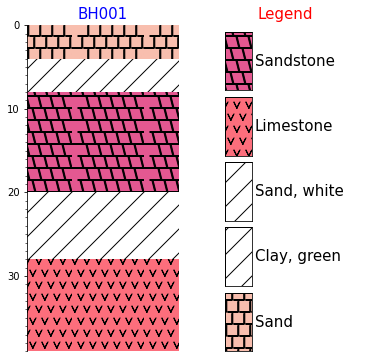

In [24]:
p.boreholes_3d[0].plot2d()

In [25]:
p.boreholes_3d[0].plot3d()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [26]:
p.boreholes_3d[0].plot3d(x3d=True)

### Display project boreholes

In [27]:
p.plot3d(bg_color=["royalblue", "aliceblue"])

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### Boreholes in 3D using X3D for interaction within the notebook